# <span style="color:#124076"><center><b>**Analyse de l'Attrition des Employés dans une Entreprise** <b><center></span>


<center>Dans un marché du travail en constante évolution, la rétention des employés est cruciale pour la stabilité des entreprises. Notre projet vise à analyser l'attrition des employés à partir de données RH. En examinant différents facteurs, nous chercherons à identifier les variables les plus influentes sur la décision de quitter l'entreprise . En comprenant ces facteurs, les entreprises peuvent prendre des mesures proactives pour améliorer la rétention des talents et maintenir leur compétitivité.</center>

## <span style="color:#A0153E"><b>1- Importation des packages et Dataset</b> </span>

<style>
.large-font {
    font-size: 30px;
}
</style>

In [1]:
#Importer les bibliothèques
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Charger les données et Mettre le fichier dans un DataFrame :
RH = pd.read_csv(r'C:\datamining\HR-Employee-Attrition.csv')
rh_df=pd.DataFrame(RH)

## <span class="large-font" style="color:#A0153E"><b>2-Exploration des données</b></span>

In [3]:
#: Afficher les premières lignes
rh_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Affichage des derniers lignes
rh_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
#représenter les dimensions du DataFrame
rh_df.shape

(1470, 35)

In [6]:
#informations sur notre Dataset
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                



***À propos des Données***

Cette collection de données comprend 35 variables et 1 470 enregistrements d'employés : 

* Age : Âge en années de l'employé
* Attrition : Départ des employés
* BusinessTravel : Fréquence des déplacements professionnels de l'employé
* DailyRate : Taux journalier auquel un employé est payé
* Department : Service où travaille l'employé
* DistanceFromHome : Distance parcourue par un employé de son domicile au travail
* Education : Niveau d'éducation de l'employé
* EducationField : Domaine d'études de l'employé
* EmployeeCount : Nombre d'employés
* EmployeeNumber : Numéro de l'employé
* EnvironmentSatisfaction : Satisfaction de l'employé vis-à-vis de l'environnement
* Gender : Genre de l'employé
* HourlyRate : Taux horaire de rémunération de l'employé
* JobInvolvement : Évaluations de l'implication dans le travail de l'employé
* JobLevel : Niveau de poste de l'employé
* JobRole : Poste de l'employé
* JobSatisfaction : Satisfaction au travail de l'employé
* MaritalStatus : État civil de l'employé
* MonthlyIncome : Revenu mensuel de l'employé
* MonthlyRate : Taux mensuel de l'employé
* NumCompaniesWorked : Nombre d'entreprises pour lesquelles l'employé a travaillé
* Over18 : Âge supérieur à 18 ans
* OverTime : Travail en heures supplémentaires
* PercentSalaryHike : Augmentation de salaire en pourcentage
* PerformanceRating : Évaluation de la performance
* RelationshipSatisfaction : Satisfaction de la relation
* StandardHours : Heures standard travaillées par l'employé
* StockOptionLevel : Niveau d'options d'achat d'actions
* TotalWorkingYears : Nombre total d'années de travail
* TrainingTimesLastYear : Nombre de formations suivies l'année dernière
* WorkLifeBalance : Évaluation de l'équilibre entre vie professionnelle et vie privée
* YearsAtCompany : Années passées dans l'entreprise
* YearsInCurrentRole : Années passées dans le rôle actuel
* YearsSinceLastPromotion : Années depuis la dernière promotion
* YearsWithCurrManager : Années avec le manager actuel

In [7]:
rh_df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- Nous pouvons confirmer l'absence de données manquantes. Cependant, il est nécessaire de vérifier si les valeurs non nulles dans chaque colonne sont valides et cohérentes ou non.

In [8]:
# Vérifier les lignes dupliquées
duplicate_rows = rh_df[rh_df.duplicated()]
duplicate_rows.shape

(0, 35)

In [9]:
#Mets les lignes en minuscules dans une copy pour vérifier s'il y a des lignes dupliquées ou non.
rh_df1 = rh_df.copy()
rh_df1['Attrition'] = rh_df1['Attrition'].str.lower()
rh_df1['BusinessTravel'] = rh_df1['BusinessTravel'].str.lower()
rh_df1['EducationField'] = rh_df1['EducationField'].str.lower()
rh_df1['Gender'] = rh_df1['Gender'].str.lower()
rh_df1['JobRole'] = rh_df1['JobRole'].str.lower()
rh_df1['MaritalStatus'] = rh_df1['MaritalStatus'].str.lower()
rh_df1['Over18'] = rh_df1['Over18'].str.lower()
rh_df1['OverTime'] = rh_df1['OverTime'].str.lower()



In [10]:
# Vérifier les lignes dupliquées
duplicate_rows = rh_df1[rh_df1.duplicated()]
duplicate_rows.shape

(0, 35)

- Nous pouvons conclure qu'il n'y a aucune ligne identique dans le DataFrame, que ce soit avec les valeurs originales ou les valeurs converties en minuscules.

In [11]:
obj_columns = rh_df.select_dtypes(include=['object'])
obj_columns

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [12]:
int_columns = rh_df.select_dtypes(include=['int64'])
int_columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


- Les variables dans le jeu de données se répartissent en 7 de type object( ou catégorielles) et 26 de type entier (ou numériques).

In [13]:
rh_df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## <span class="large-font" style="color:#A0153E"><b>3-Nettoyage des données</b></span>



- Après avoir examiné le résultat de la fonction `describe()` ci-dessus, il semble qu'il y ait des colonnes avec une seule valeur unique. Cela ne fournit aucune information utile ni aucun pouvoir prédictif. Par conséquent, je vais les identifier et les supprimer.

In [14]:
single = dict()
for col in rh_df.columns:
    if len(rh_df[col].unique()) == 1:
        single.update({col: rh_df[col].unique().tolist()})
        
print('Colonnes avec une seule valeur: %s' % single)

Colonnes avec une seule valeur: {'EmployeeCount': [1], 'Over18': ['Y'], 'StandardHours': [80]}



Nous avons 3 colonnes avec une seule valeur unique, nous pouvons les supprimer de l'ensemble de données.

In [15]:
rh_df = rh_df.drop(columns=single)
rh_df.shape

(1470, 32)

- La colonne "EmployeeNumber" contient des numéros différents pour chaque employé, ce qui suggère qu'il s'agit d'une colonne d'identification unique pour chaque employé (ID), cette colonne n'ajoute pas d'informations significatives car elle ne fournit pas de données pertinentes pour les modèles ou les insights recherchés. Par conséquent, elle peut être supprimée .

In [16]:
rh_df.drop('EmployeeNumber', axis=1, inplace=True)
rh_df.shape

(1470, 31)

In [17]:
int_columns = rh_df.select_dtypes(include=['int64'])
int_columns.nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [18]:
rh_df[['PerformanceRating', 'Education', 'JobLevel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].apply(lambda x: x.unique())


PerformanceRating                    [3, 4]
Education                   [2, 1, 4, 3, 5]
JobLevel                    [2, 1, 3, 4, 5]
EnvironmentSatisfaction        [2, 3, 4, 1]
JobInvolvement                 [3, 2, 4, 1]
JobSatisfaction                [4, 2, 3, 1]
RelationshipSatisfaction       [1, 4, 2, 3]
WorkLifeBalance                [1, 3, 2, 4]
dtype: object


- Après avoir examiné le contenu de chaque colonne et leur type, nous concluons que certaines variables sont de type entier, mais il serait préférable de les convertir en variables catégorielles pour une meilleure visualisation et compréhension des données.

1. **Education :**
   - 1: "Below College" (Niveau inférieur au collège)
   - 2: "College" (Collège)
   - 3: "Bachelor" (Licence)
   - 4: "Master" (Master)
   - 5: "PhD" (Doctorat)
2. **JobLevel :**
   - 1: "Entry Level" (Niveau d'entrée)
   - 2: "Intermediate Level" (Niveau intermédiaire)
   - 3: "Senior Level" (Niveau senior)
   - 4: "Manager" (Manager)
   - 5: "Executive" (Cadre)
3. **PerformanceRating :**
   - 1: "Low" (Faible)
   - 2: "High" (Élevé)
4. **EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance :**
   - 1: "Low" (Faible)
   - 2: "Medium" (Moyen)
   - 3: "High" (Élevé)
   - 4: "Very High" (Très élevé)


In [19]:

# Créer un dictionnaire pour mapper les valeurs numériques aux catégories
education_map = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "PhD"
}
job_level_map = {
    1: "Entry Level",
    2: "Intermediate Level",
    3: "Senior Level",
    4: "Manager",
    5: "Executive"
}
performance_rating_map = {
    3: "Low",
    4: "High"
}
satisfaction_map = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# Appliquer la conversion pour chaque colonne
rh_df['Education'] = rh_df['Education'].map(education_map)
rh_df['JobLevel'] = rh_df['JobLevel'].map(job_level_map)
rh_df['PerformanceRating'] = rh_df['PerformanceRating'].map(performance_rating_map)
rh_df['EnvironmentSatisfaction'] = rh_df['EnvironmentSatisfaction'].map(satisfaction_map)
rh_df['JobInvolvement'] = rh_df['JobInvolvement'].map(satisfaction_map)
rh_df['JobSatisfaction'] = rh_df['JobSatisfaction'].map(satisfaction_map)
rh_df['RelationshipSatisfaction'] = rh_df['RelationshipSatisfaction'].map(satisfaction_map)
rh_df['WorkLifeBalance'] =rh_df['WorkLifeBalance'].map(satisfaction_map)

# Afficher les premières lignes du DataFrame pour vérifier la conversion
rh_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Low,Low,0,8,0,Low,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,High,Very High,1,10,3,High,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Low,Medium,0,7,3,High,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Low,High,0,8,3,High,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Low,Very High,1,6,3,High,2,2,2,2


- Nous allons convertir les valeurs 'Yes'/'No' de la variable d'attrition en valeurs numériques 1/0, car cette représentation binaire simplifie le traitement par les algorithmes d'apprentissage automatique. Cela facilite une analyse et une modélisation plus efficaces des données.
*  "Yes" indique que l'employé a quitté l'entreprise
*  "No" indique que l'employé est toujours actif dans l'entreprise.

In [20]:
print(rh_df['Attrition'].unique())

['Yes' 'No']


In [21]:
rh_df['Attrition'] = rh_df['Attrition'].map({'Yes': 1, 'No': 0})
print(rh_df['Attrition'].unique())

[1 0]


In [22]:
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         



- Après l'observation et le nettoyage des données, nous avons abouti à un ensemble de données épuré comprenant 1470 lignes et 31 colonnes. Parmi celles-ci, 16 sont de type entier et 15 de type objet. Ce dataset a été soigneusement traité pour éliminer les valeurs nulles et les doublons. Certaines colonnes ont été supprimées car elles n'apportaient pas de valeur ajoutée à notre objectif de prédiction de l'attrition des employés. De plus, certaines variables ont été converties en catégorielles pour une meilleure analyse. Notre projet vise à examiner différents facteurs afin d'analyser et prédire l'attrition des employés à partir de données RH.

## <span style="color:#A0153E" class="large-font"><b> 4- Analyse exploratoire des données </b> </span>

* Nous commençons notre analyse en explorant la colonne "attrition" afin de mieux comprendre sa distribution, ce qui nous permettra de progresser vers notre objectif.

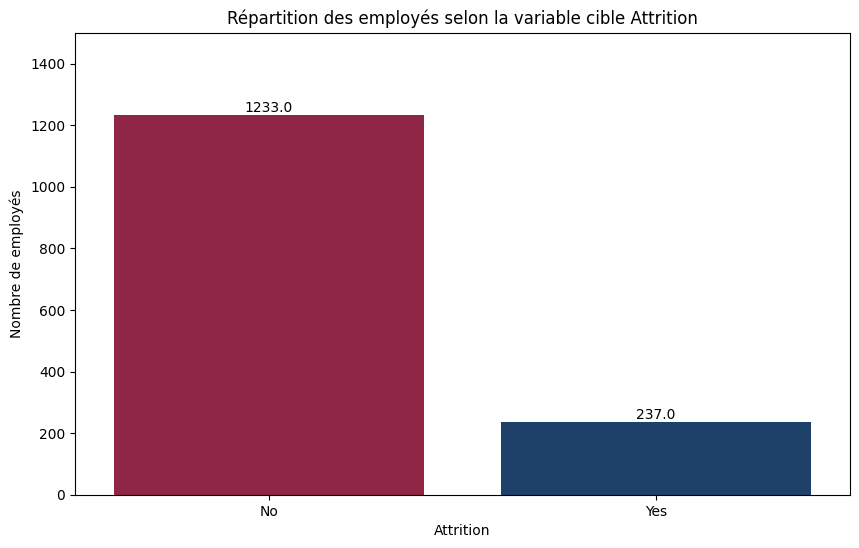

In [23]:
# voir la répartition des clients selon la variable churn
plt.figure(figsize=(10,6))

ax = sns.countplot(x="Attrition", data=rh_df, palette = ["#A0153E", "#124076"])

plt.title('Répartition des employés selon la variable cible Attrition')
plt.xlabel("Attrition")
plt.ylabel("Nombre de employés")
plt.ylim(0,1500)
plt.xticks([0,1], ['No', 'Yes'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


*`=>En observant la proportion des étiquettes, il est clair qu'il existe un déséquilibre notable entre les catégories "Attrition = yes" et "Attrition = no". La majorité des données de désabonnement sont étiquetées comme "no", avec une valeur de 1233, alors que prédire correctement les cas "yes", qui ont une valeur de 237, revêt une importance particulière`*

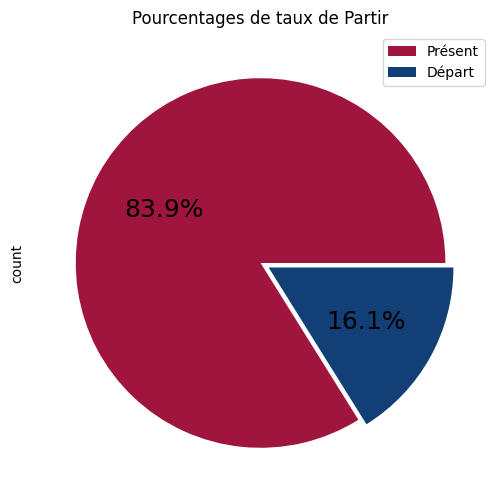

In [24]:
# voir le taux de désabonnement des clients
plt.figure(figsize=(10,6))

rh_df['Attrition'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['#A0153E','#124076'], explode = [0,0.05], textprops = {"fontsize":18})

plt.title('Pourcentages de taux de Partir')
plt.legend(labels=['Présent', 'Départ'])


*`=> Donc on peut verifier que ensemble de données est déséquilibré.En fait il ya (83.9%) de personnes dont le nombre est 1233 qui n'ont pas quitte l'entreprise tandis que (16.1%) l'on fait   `*

* En progressant dans l'analyse des fonctionnalités, nous pouvons évaluer le pourcentage de partir associé à chaque catégorie, offrant ainsi un aperçu plus précis de l'impact qu'une fonctionnalité donnée peut avoir sur la capacité de l'entreprise à conserver ses employés.

# <span style="color:#124076"><b>Classification Des Colonnes En Groupes</b> </span>

On classera les colonnes en groupes thématiques vise à structurer et organiser les données, rendant ainsi l'analyse plus accessible et la compréhension des tendances et des modèles au sein de l'entreprise plus aisée. 
1. **Informations personnelles et démographiques :** 
   - 1: Age
   - 2: Gender
   - 3: MaritalStatus
2. **Caractéristiques professionnelles :**
   - 1: Department
   - 2: JobRole
   - 3: JobLevel
   - 4: JobInvolvement
   - 5: NumCompaniesWorked
   - 6: YearsAtCompany
   - 7: YearsInCurrentRole
   - 8: YearsSinceLastPromotion
   - 9: YearsWithCurrManager
3. **Expérience et performance au travail :**
   - 1: BusinessTravel
   - 2: DailyRate
   - 3: HourlyRate
   - 4: MonthlyIncome
   - 5: MonthlyRate
   - 6: PercentSalaryHike
   - 7: PerformanceRating
   - 8: StockOptionLevel
   - 9: TotalWorkingYears
   - 10 : TrainingTimesLastYear
4. **Satisfaction et équilibre travail-vie:**
   - 1: EnvironmentSatisfaction
   - 2: JobSatisfaction
   - 3: RelationshipSatisfaction
   - 4 :  WorkLifeBalance
5. **Autres facteurs:**
   - 1: DistanceFromHome
   - 2: Education
   - 3: EducationField 
   - 6 : OverTime


> ***Variables personnelles et démographiques***

In [25]:
#créer une nouvelle DataFrame à partir de la DataFrame existante rh_df en ne sélectionnant que les colonnes 'Age', 'Gender' et 'MaritalStatus'
var_pers= rh_df[['Age', 'Gender', 'MaritalStatus']]

In [26]:
# Sélectionner le premier DataFrame de la liste
var_pers.describe(include='all')


,Age,Gender,MaritalStatus
count,1470.000000,1470,1470
unique,NaN,2,3
top,NaN,Male,Married
freq,NaN,882,673
mean,36.923810,NaN,NaN
std,9.135373,NaN,NaN
min,18.000000,NaN,NaN
25%,30.000000,NaN,NaN
50%,36.000000,NaN,NaN
75%,43.000000,NaN,NaN


Jetons un coup d'œil , on peut remarquer que : 
* **Pour la colonne 'Age'**:
   - La moyenne d'âge des employés est d'environ 36,92 ans.
   - L'âge minimum est de 18 ans et l'âge maximum est de 60 ans. 
   - 25% des employés ont un âge inférieur ou égal à 30 ans et 75% ont un âge        inférieur ou égal à 43 ans
* **Pour la colonne 'Gender'**:
   - La valeur la plus fréquente est 'Male' avec une fréquence de 882.
* **Pour la colonne 'MaritalStatus''**:
   - La valeur la plus fréquente est 'Married' avec une fréquence de 673.
  


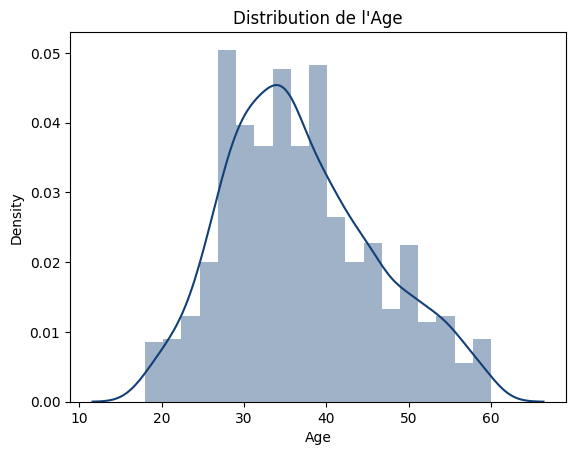

In [27]:
sns.distplot(
    rh_df["Age"],
    color='#124076',
    kde = True, 
    hist = True).set_title("Distribution de l'Age");

La distribution de l'âge, selon cet histogramme, est caractérisée par
- **Forme de la distribution:** bimodale, ce qui signifie qu'il y a deux pics distincts.Le premier pic se situe autour de 25 ans, tandis que le deuxième pic se situe autour de 40 an
- **Médiane**: Dans ce cas, la médiane est d'environ 32 ans. Cela signifie que 50 % des employés ont moins de 32 ans et 50 % ont plus de 32 ans
- **Densité**: La densité de la distribution est variable. La densité est plus élevée autour des deux pics et plus faible entre les deux. Cela indique que la plupart des employés se situent dans les deux groupes d'âge majoritaires, avec un nombre plus petit d'employés dans les tranches d'âge intermédiaires.


*`=> Donc en peut interpreter que La distribution du l'age dans l'entreprise est bimodale et asymétrique vers la gauche , centrée à 32 avec la plupart des valeurs entre 30.0  (1er quartile) et 43.0 (3è quartile) et apparemment quelques valeurs aberrantes   `*


*`=> Pour repérer les valeurs aberrantes, nous allons utiliser la méthode de la boîte à moustaches.  `*

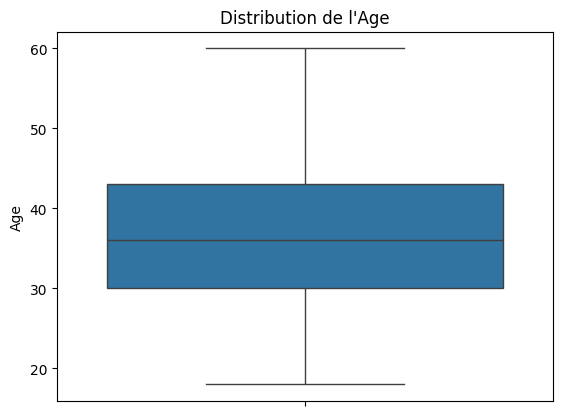

In [28]:
# Boîte à moustache de l'Age

sns.boxplot(rh_df["Age"]).set_title("Distribution de l'Age");

*`=> Selon le diagramme à moustache de l'Age, il ne semble pas y avoir de valeurs aberrantes évidentes dans la distribution des âges. `*

*`=>Afin de simplifier l'analyse, nous allons regrouper les employés en deux catégories d'âge : les jeunes et les séniors. `*

In [29]:
import pandas as pd

# Sélectionner les colonnes pertinentes
var_pers = rh_df[['Age', 'Gender', 'MaritalStatus']]

# Définir les intervalles pour les catégories d'âge
bins = [0, 356, float('inf')]  # 0-35 pour les jeunes, 35 et plus pour les seniors

# Définir les étiquettes pour les catégories
labels = ['jeune', 'sénior']

# Convertir la colonne 'Age' en variable catégorielle avec deux catégories
var_pers['Age_Category'] = pd.cut(var_pers['Age'], bins=bins, labels=labels, right=False)

# Afficher les premières lignes de la DataFrame avec la nouvelle variable catégorielle
print(var_pers.head())


   Age  Gender MaritalStatus Age_Category
0   41  Female        Single        jeune
1   49    Male       Married        jeune
2   37    Male        Single        jeune
3   33  Female       Married        jeune
4   27    Male       Married        jeune


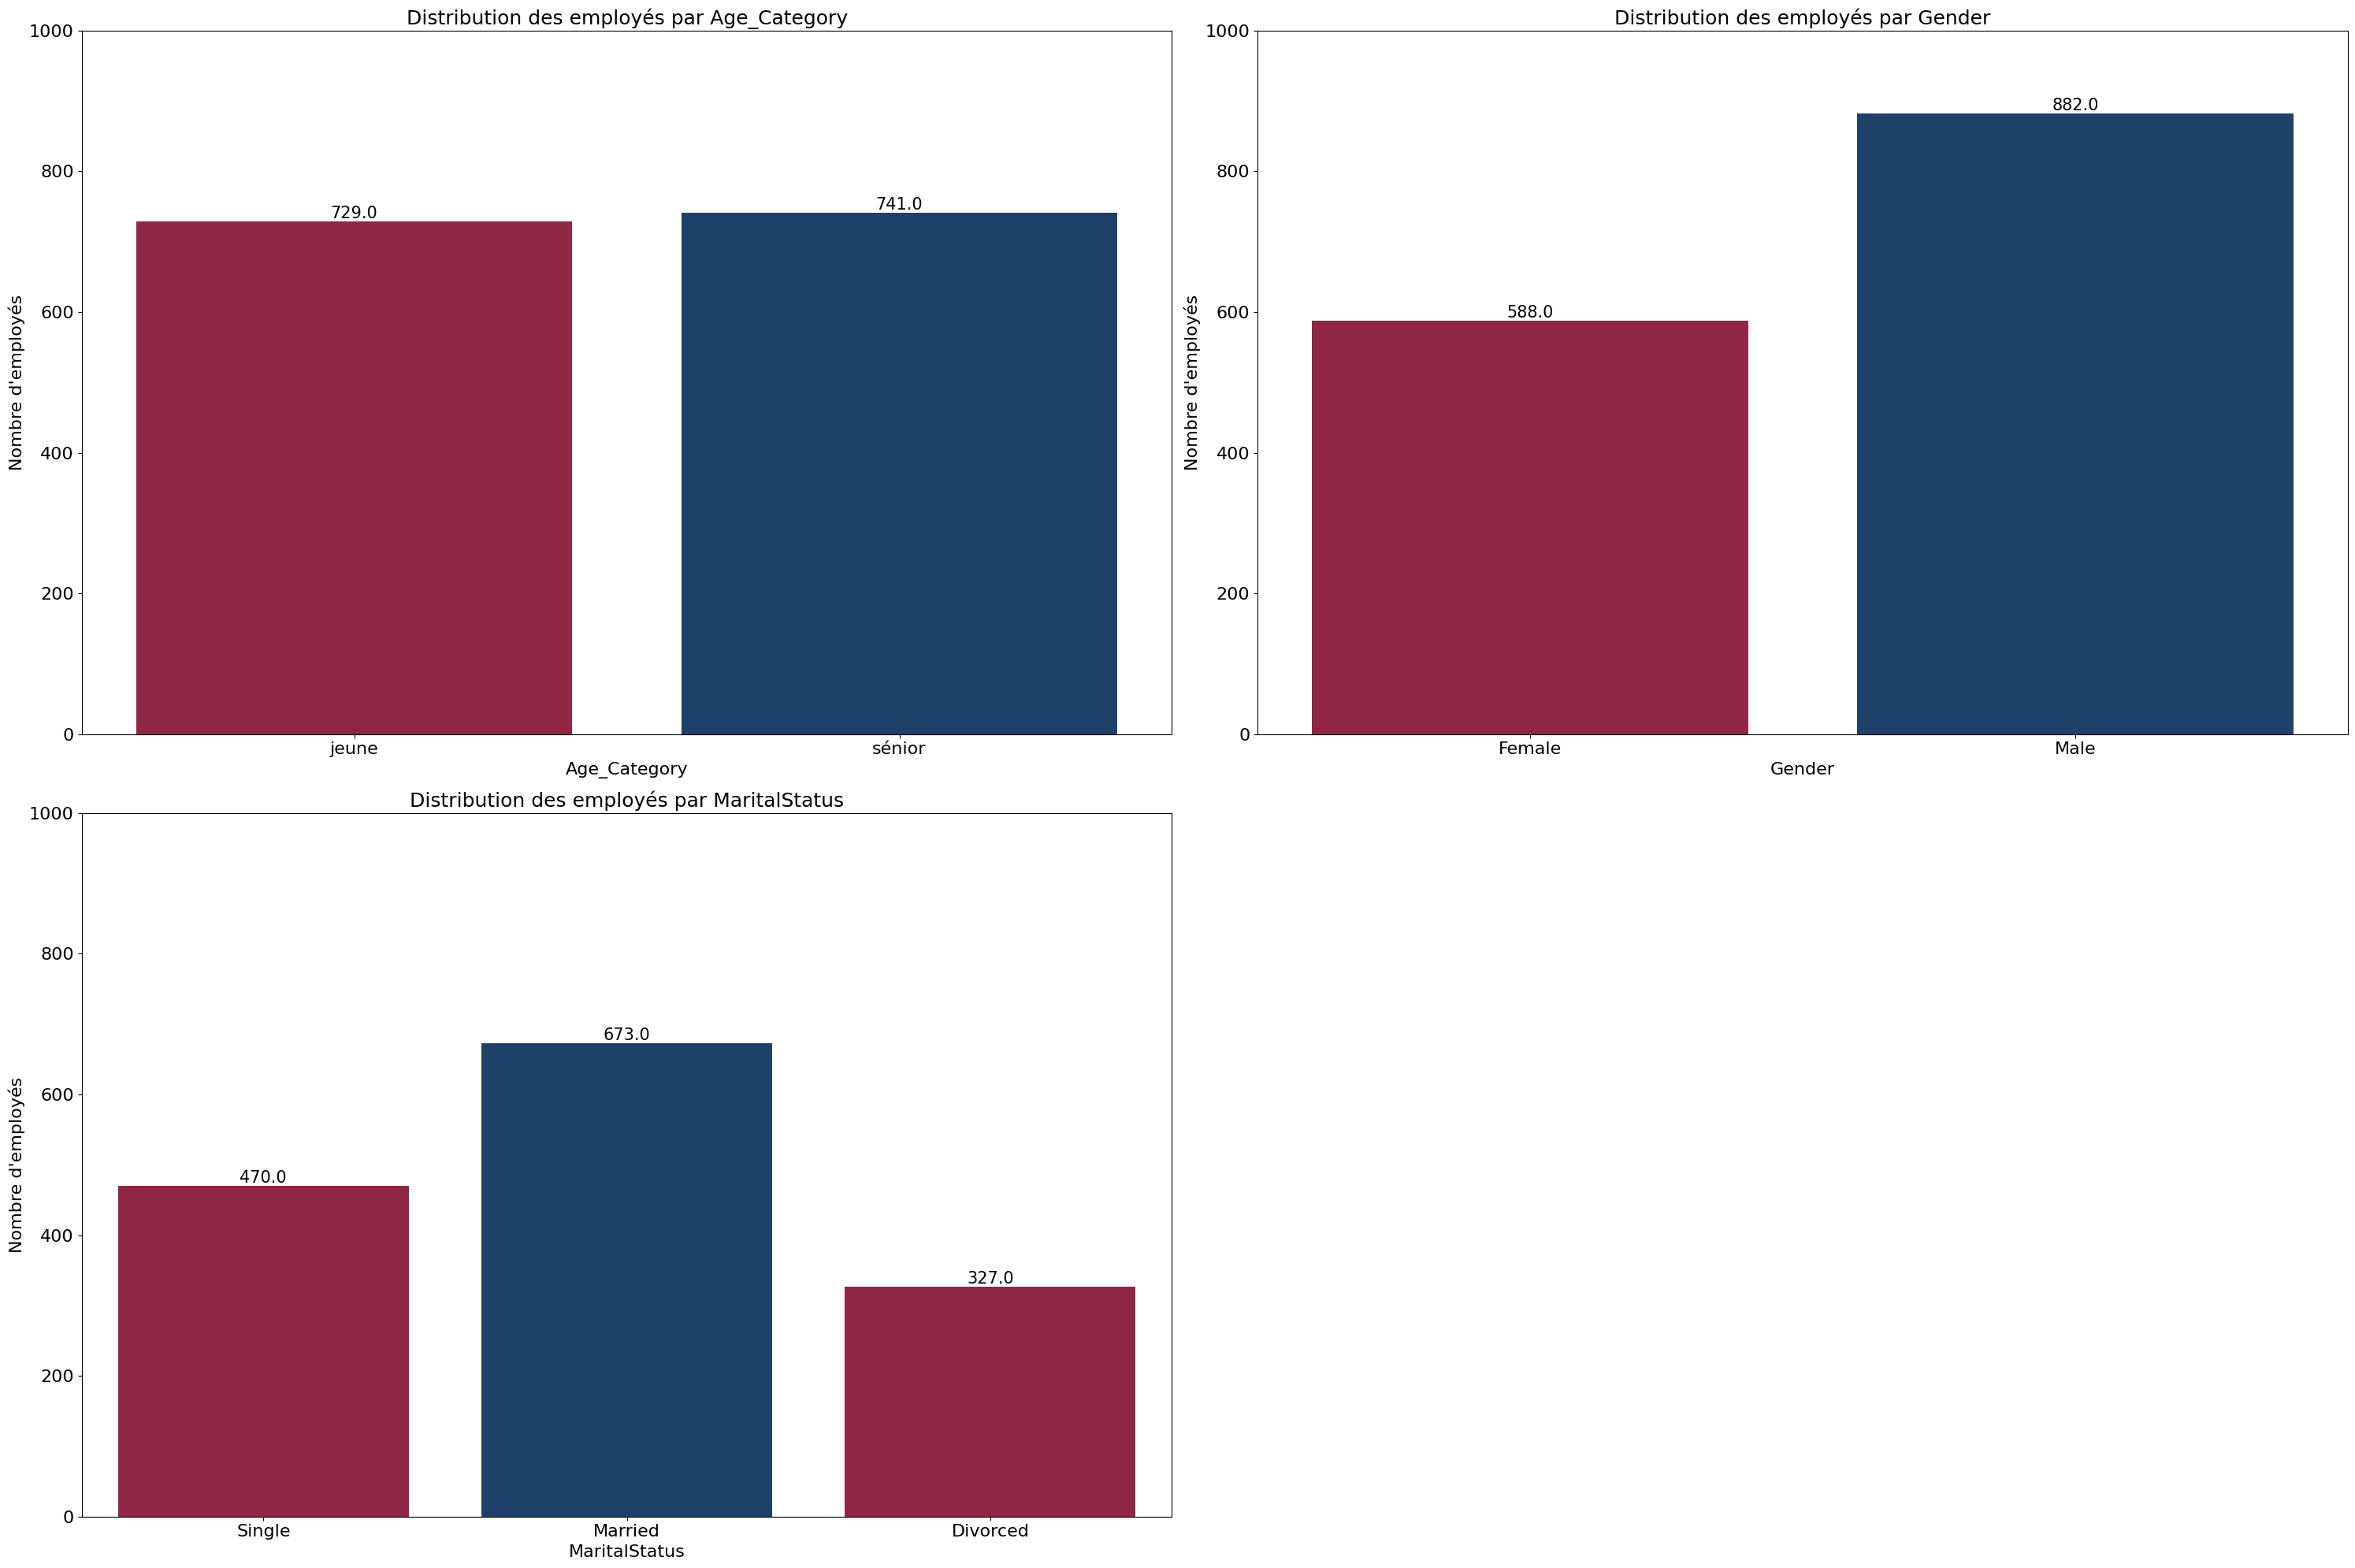

In [30]:
import pandas as pd

# Sélectionner les colonnes pertinentes
var_pers = rh_df[['Age', 'Gender', 'MaritalStatus']]

# Convertir l'âge en catégorie avec deux catégories : jeune et sénior
var_pers['Age_Category'] = pd.cut(rh_df['Age'], bins=[0, 35, float('inf')], labels=['jeune', 'sénior'])

# Créer une liste des colonnes à afficher
var_pers_list = ['Age_Category', 'Gender', 'MaritalStatus']

# Tracer les countplots pour chaque colonne
plt.figure(figsize=(30, 20))

for i, col in enumerate(var_pers_list):
    plt.subplot(2, 2, i + 1)

    ax = sns.countplot(data=var_pers, x=col, palette=['#A0153E', '#124076'])

    plt.title('Distribution des employés par ' + col, fontsize=18)
    plt.xlabel(col, fontsize=16)
    plt.ylabel("Nombre d'employés", fontsize=16)
    plt.ylim(0, 1000)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=15)

plt.tight_layout()

plt.show()


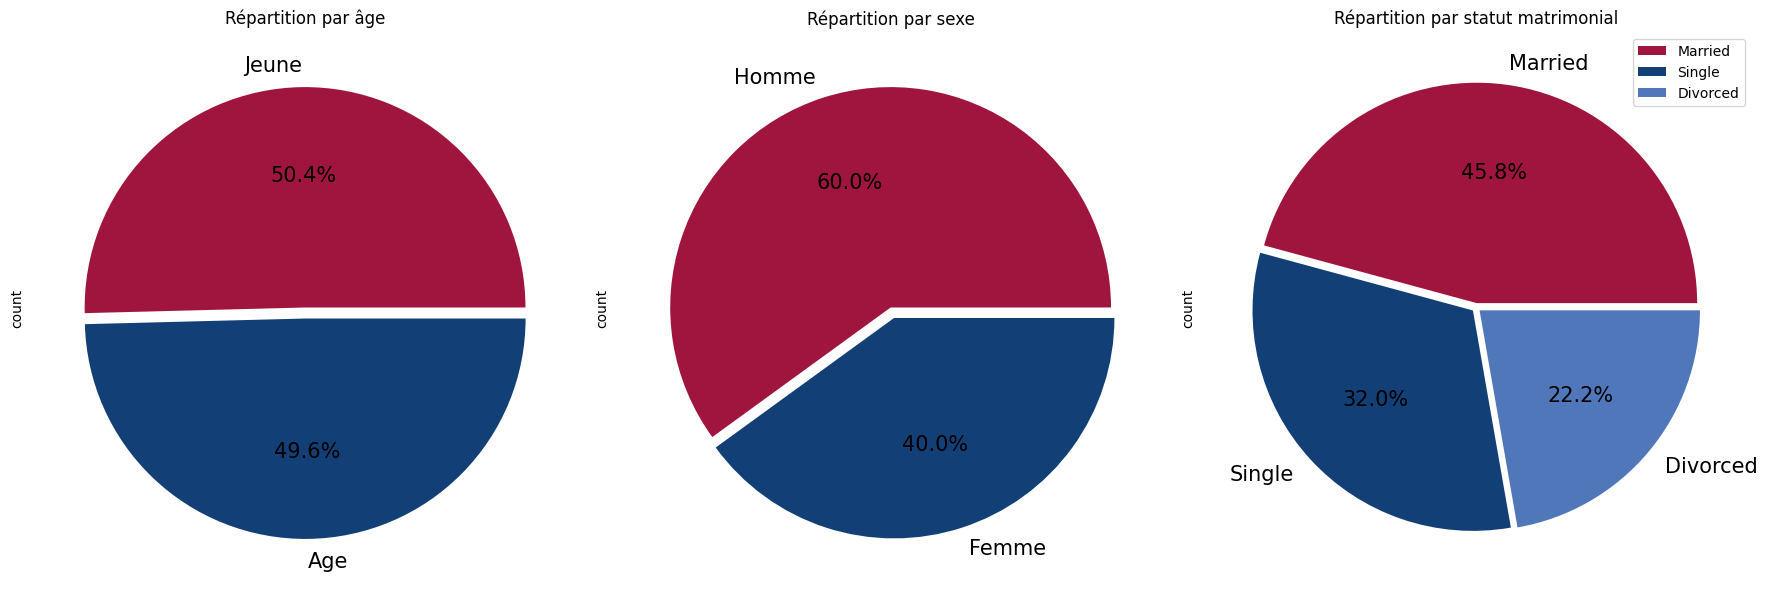

In [31]:
import matplotlib.pyplot as plt

# Création d'une figure avec trois sous-graphiques alignés horizontalement
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Répartition des employés selon l'âge
var_pers['Age_Category'].value_counts().plot(kind='pie', labels=['Jeune', 'Age'], autopct='%1.1f%%', colors=['#A0153E', '#124076'], explode=[0, 0.05], textprops={"fontsize": 15}, ax=axes[0])
axes[0].set_title('Répartition par âge')

# Répartition des employés selon le sexe
var_pers['Gender'].value_counts().plot(kind='pie', labels=['Homme', 'Femme'], autopct='%1.1f%%', colors=['#A0153E', '#124076'], explode=[0, 0.05], textprops={"fontsize": 15}, ax=axes[1])
axes[1].set_title('Répartition par sexe')

# Répartition des employés selon le statut matrimonial
var_pers['MaritalStatus'].value_counts().plot(kind='pie', labels=['Married', 'Single', 'Divorced'], autopct='%1.1f%%', colors=['#A0153E', '#124076', '#5177BB'], explode=[0.02, 0.02, 0.02], textprops={"fontsize": 15}, ax=axes[2])
axes[2].set_title('Répartition par statut matrimonial')

# Affichage de la légende
plt.legend(loc='upper right')

# Ajustement du layout pour un affichage optimal
plt.tight_layout()

# Affichage du graphique
plt.show()


In [32]:
var_pers['Attrition'] = rh_df['Attrition']
var_pers_list = ['Age_Category', 'Gender', 'MaritalStatus', 'Attrition']

# Voir le taux de départ exacte selon l'age
print(var_pers.groupby(by=['Age_Category'])['Attrition'].value_counts(normalize = True))
print('-------')
# Voir le taux de départ exacte selon l'sexe
print(var_pers.groupby(by=['Gender'])['Attrition'].value_counts(normalize = True))
print('-------')
# Voir le taux de désabonnement exacte selon la MaritalStatus
print(var_pers.groupby(by=['MaritalStatus'])['Attrition'].value_counts(normalize = True))
print('-------')


Age_Category  Attrition
jeune         0            0.780521
              1            0.219479
sénior        0            0.896086
              1            0.103914
Name: proportion, dtype: float64
-------
Gender  Attrition
Female  0            0.852041
        1            0.147959
Male    0            0.829932
        1            0.170068
Name: proportion, dtype: float64
-------
MaritalStatus  Attrition
Divorced       0            0.899083
               1            0.100917
Married        0            0.875186
               1            0.124814
Single         0            0.744681
               1            0.255319
Name: proportion, dtype: float64
-------


### <span style="color:#124076">Conclusion pour la premiere groupe </span>

1. **Variable Age** 
-  les jeunes et les seniors sont également répartis dans notre échantillon, tandis qu'il y a pratiquement un différence dans leurs taux de départ : ( 21%) pour les jeunes qui sont au nombre de (729) et (10%) pour les seniors représentant (741)  ce qui est presque deux fois plus élevé que les non seniors; tout en indiquant une forte probabilité de depart de ce groupe par raport a l'autre .



2. **Variable Gender**
-   Une grande partie des employes est représentée par les hommes (60,0%) dont leur nombre est (882), alors que les femmes ne représentent que (40.0%) dont leur nombre est (588) du total des employees ainsi qu'il n'y a pratiquement une forte différence dans leurs taux de désabonnement : (14%) pour les femmes  et (17%) pour les hommes; ce qui signifie que le sexe a peu ou pas d'effet sur le depart de l'entreprise . 



3. **Variable MaritalStatus**
-  Effectivement, parmi les employés de l'entreprise, les plus nombreux sont les mariés (673), suivis des célibataires (470) et des divorcés (327). Cependant, il est intéressant de noter que les taux de départ présentent des différences notables. Les célibataires affichent le taux de départ le plus élevé (25%), tandis que les taux de départ des mariés (12%) et des divorcés (10%) sont relativement proches. 


*`=> En conclusion, l'entreprise doit prendre en compte les facteurs d'âge et de statut marital pour mieux comprendre et réduire le taux de départ des employés. Des efforts ciblés pour améliorer la satisfaction et l'engagement des employés, en particulier parmi les jeunes et les célibataires, peuvent contribuer à créer un environnement de travail plus favorable et à réduire le turnover.`*


> ***Caractéristiques professionnelles***

In [33]:
#créer une nouvelle DataFrame à partir de la DataFrame existante rh_df en ne sélectionnant que les colonnes suivantes 
rhdf = rh_df[['Department', 'JobRole', 'JobLevel', 'JobInvolvement', 'NumCompaniesWorked', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']]
                    

In [34]:
rhdf.describe(include='all')

,Department,JobRole,JobLevel,JobInvolvement,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1470,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,3,9,5,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Research & Development,Sales Executive,Entry Level,High,NaN,NaN,NaN,NaN,NaN,NaN
freq,961,326,543,868,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.693197,7.008163,4.229252,2.187755,4.123129,0.161224
std,NaN,NaN,NaN,NaN,2.498009,6.126525,3.623137,3.222430,3.568136,0.367863
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,2.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,4.000000,9.000000,7.000000,3.000000,7.000000,0.000000


- **Department :** 
Il y a trois départements principaux : Recherche et développement, Ventes et RH.
Le département le plus fréquent est la Recherche et développement, suivi des Ventes et des RH

- **JobRole :**
Il y a neuf rôles d'emploi différents.
Le rôle le plus fréquent est celui de Sales Executive, suivi de Research Scientist et Laboratory Technician.

- **JobLevel :**
Il y a cinq niveaux d'emploi différents.
La plupart des employés se situent au niveau débutant (Entry Level).

- **JobInvolvement :**
Il y a quatre niveaux d'implication dans le travail : Faible, Moyenne, Haute, Très haute.
La plupart des employés ont un niveau d'implication élevé dans leur travail.

- **NumCompaniesWorked :**
Ce nombre indique combien de sociétés différentes les employés ont travaillé avant de rejoindre cette entreprise.
La moyenne est d'environ 2,7 sociétés différentes. Cela peut indiquer une certaine mobilité professionnelle parmi les employés.

- **YearsAtCompany :**
La moyenne est d'environ 7 ans.Cela suggère une certaine stabilité de l'emploi parmi les employés.

- **YearsInCurrentRole :**
La moyenne est d'environ 4 ans.Cela indique la durée moyenne passée dans le rôle actuel par les employés.

- **YearsSinceLastPromotion :**
La moyenne est d'environ 2 ans.Cela indique la durée moyenne depuis la dernière promotion des employés.

- **YearsWithCurrManager :**
La moyenne est d'environ 4 ans.Cela indique la durée moyenne de travail avec le même manager pour les employés.

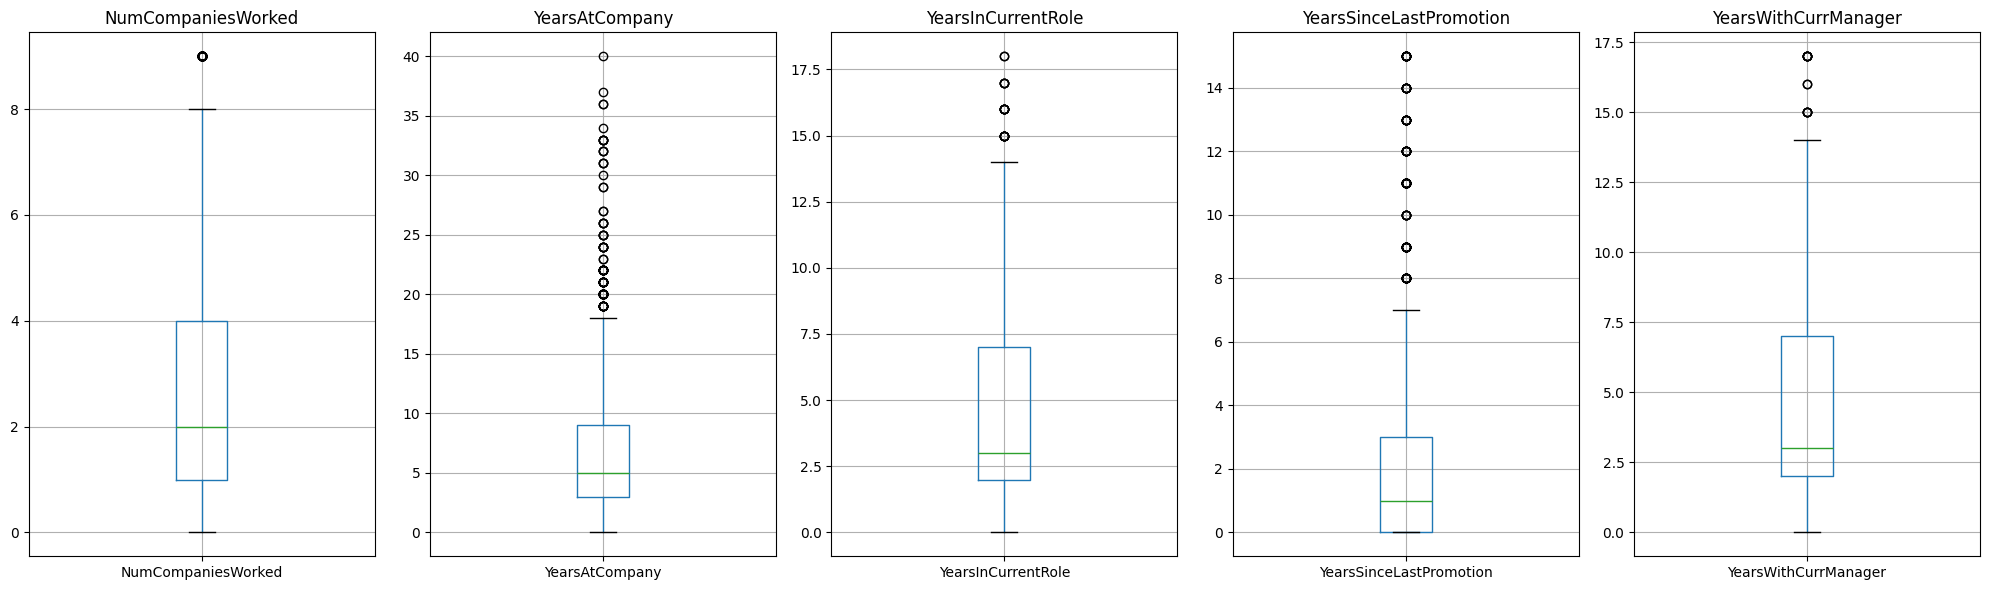

Nombre de valeurs aberrantes pour 'NumCompaniesWorked': 52
Nombre de valeurs aberrantes pour 'YearsAtCompany': 104
Nombre de valeurs aberrantes pour 'YearsInCurrentRole': 21
Nombre de valeurs aberrantes pour 'YearsSinceLastPromotion': 107
Nombre de valeurs aberrantes pour 'YearsWithCurrManager': 14


In [35]:

# Sélectionner les variables avec des valeurs aberrantes
variables_aberrantes = ['NumCompaniesWorked', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Créer des sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=1, ncols=len(variables_aberrantes), figsize=(20, 6))

# Tracer les boîtes à moustaches pour chaque variable
for i, var in enumerate(variables_aberrantes):
    rh_df.boxplot(column=var, ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

# Définir le seuil pour déterminer les valeurs aberrantes
seuil_aberrant = 1.5

# Créer un dictionnaire pour stocker le nombre de valeurs aberrantes pour chaque variable
valeurs_aberrantes_par_variable = {}

# Itérer sur chaque variable pour calculer le nombre de valeurs aberrantes
for var in variables_aberrantes:
    # Calculer les limites de la boîte à moustaches
    q1 = rh_df[var].quantile(0.25)
    q3 = rh_df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - seuil_aberrant * iqr
    upper_bound = q3 + seuil_aberrant * iqr
    
    # Compter le nombre de valeurs aberrantes
    valeurs_aberrantes = ((rh_df[var] < lower_bound) | (rh_df[var] > upper_bound)).sum()
    
    # Stocker le nombre de valeurs aberrantes dans le dictionnaire
    valeurs_aberrantes_par_variable[var] = valeurs_aberrantes

# Afficher le nombre de valeurs aberrantes pour chaque variable
for var, count in valeurs_aberrantes_par_variable.items():
    print(f"Nombre de valeurs aberrantes pour '{var}': {count}")


- <b>Les valeurs aberrantes ont-elles une incidence sur l'attrition des employés ?</b>

In [36]:
# Diviser les données en deux groupes : avec et sans valeurs aberrantes
aberrant_data = rh_df[(rh_df['NumCompaniesWorked'] > 9) | (rh_df['YearsAtCompany'] > 15) | (rh_df['YearsInCurrentRole'] > 12) | (rh_df['YearsSinceLastPromotion'] > 10) | (rh_df['YearsWithCurrManager'] > 10)]
non_aberrant_data = rh_df[~((rh_df['NumCompaniesWorked'] > 9) | (rh_df['YearsAtCompany'] > 15) | (rh_df['YearsInCurrentRole'] > 12) | (rh_df['YearsSinceLastPromotion'] > 10) | (rh_df['YearsWithCurrManager'] > 10))]

# Calculer le taux d'attrition pour chaque groupe
attrition_rate_aberrant = aberrant_data['Attrition'].mean()
attrition_rate_non_aberrant = non_aberrant_data['Attrition'].mean()

# Afficher les taux d'attrition
print("Taux d'attrition pour le groupe avec valeurs aberrantes:", attrition_rate_aberrant)
print("Taux d'attrition pour le groupe sans valeurs aberrantes:", attrition_rate_non_aberrant)

# Effectuer un test statistique pour comparer les taux d'attrition
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(aberrant_data['Attrition'], non_aberrant_data['Attrition'])
print("Statistique de test t:", t_stat)
print("Valeur de p associée au test t:", p_value)


Taux d'attrition pour le groupe avec valeurs aberrantes: 0.08
Taux d'attrition pour le groupe sans valeurs aberrantes: 0.1722007722007722
Statistique de test t: -3.1212755986859473
Valeur de p associée au test t: 0.001835802943061374


- L'analyse comparative des taux d'attrition entre le groupe avec des valeurs aberrantes et celui sans valeurs aberrantes révèle une distinction significative. Le groupe avec des valeurs aberrantes affiche un taux d'attrition de 0.08, tandis que celui sans valeurs aberrantes présente un taux plus élevé de 0.1722. Les résultats du test t confirment cette disparité, avec une statistique de -3.1213 et une valeur de p de 0.0018, inférieure au seuil alpha de 0.05. Cela suggère une association significative entre les valeurs aberrantes et l'attrition.  <b>Néanmoins</b>, il est important de noter que les valeurs aberrantes ne constituent pas nécessairement la seule cause principale de l'attrition, mais plutôt un indicateur parmi d'autres, soulignant la complexité des facteurs contribuant à ce phénomène.

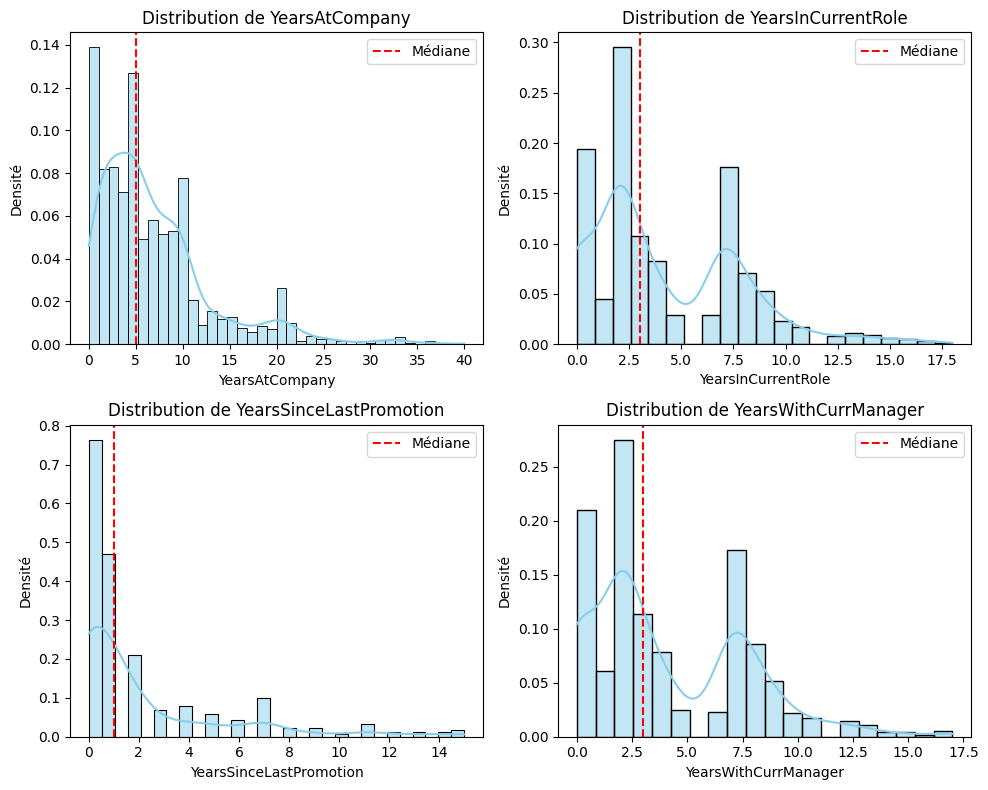

In [37]:
# Sélection des variables pour lesquelles nous voulons visualiser la distribution
variables = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Définir le nombre de lignes et de colonnes pour les sous-tracés
num_rows = len(variables) // 2
num_cols = 2

# Créer une figure et des axes pour les sous-tracés
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Boucle sur chaque variable pour créer un distplot avec densité et médiane
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(rh_df[var], kde=True, color='skyblue', stat='density', ax=axes[row, col])
    axes[row, col].axvline(rh_df[var].median(), color='red', linestyle='dashed', linewidth=1.5, label='Médiane')
    axes[row, col].set_title(f'Distribution de {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Densité')
    axes[row, col].legend()

# Ajuster l'espacement entre les sous-tracés
plt.tight_layout()
plt.show()



L'examen des distributions des variables clés met en lumière les points suivants :

- **YearsAtCompany** : La densité maximale se situe autour de 2 ans, indiquant que la majorité des employés ont été promus il y a environ 2 ans. Environ 22% des employés ont reçu leur dernière promotion il y a environ 2 ans.

- **YearsInCurrentRole** : La distribution montre que la plupart des employés occupent leur poste actuel depuis environ 2,5 ans, avec environ 25% ayant été promus à leur poste actuel il y a environ 2,5 ans.

- **YearsSinceLastPromotion** : La densité maximale se trouve autour de 1,5 an, suggérant que la plupart des employés ont été promus il y a environ 1,5 an. Environ 28% des employés ont bénéficié de leur dernière promotion il y a environ 1,5 an.

- **YearsWithCurrManager** : La distribution montre que la plupart des employés travaillent avec leur manager actuel depuis environ 1,75 an, avec environ 37,5% travaillant avec leur manager actuel depuis une durée comprise entre 1,25 et 2,25 ans.

En résumé, ces analyses suggèrent une stabilité relative dans les promotions et les rôles actuels, avec des périodes moyennes de service relativement courtes avec le même manager. Cependant, il est nécessaire de poursuivre l'analyse pour comprendre pleinement l'impact de ces variables sur l'attrition des employés.


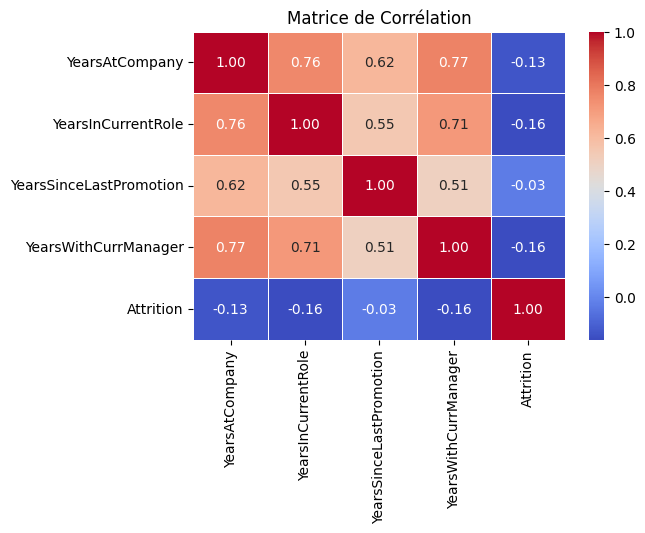

In [38]:
# Sélection des variables pertinentes
selected_columns = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
selected_data = rh_df[selected_columns]

# Calcul de la matrice de corrélation
correlation_matrix = selected_data.corr()

# Création du heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()


En se basant sur la "Matrice de Corrélation", on peut conclure que plusieurs facteurs semblent influencer le taux d'attrition au sein de l'entreprise :

- L'ancienneté : La corrélation négative, bien que faible, entre l'attrition et les années dans l'entreprise, les années dans le poste actuel et les années avec le manager actuel suggère que les employés plus anciens sont moins susceptibles de quitter l'entreprise.
  
- L'évolution de carrière : La corrélation positive modérée entre les années dans l'entreprise et les années depuis la dernière promotion suggère qu'une politique de promotion régulière peut jouer un rôle dans la rétention des employés.
  
Cependant, il est important de garder à l'esprit que la corrélation n'implique pas la causalité. D'autres facteurs non pris en compte par ce diagramme pourraient également influencer l'attrition



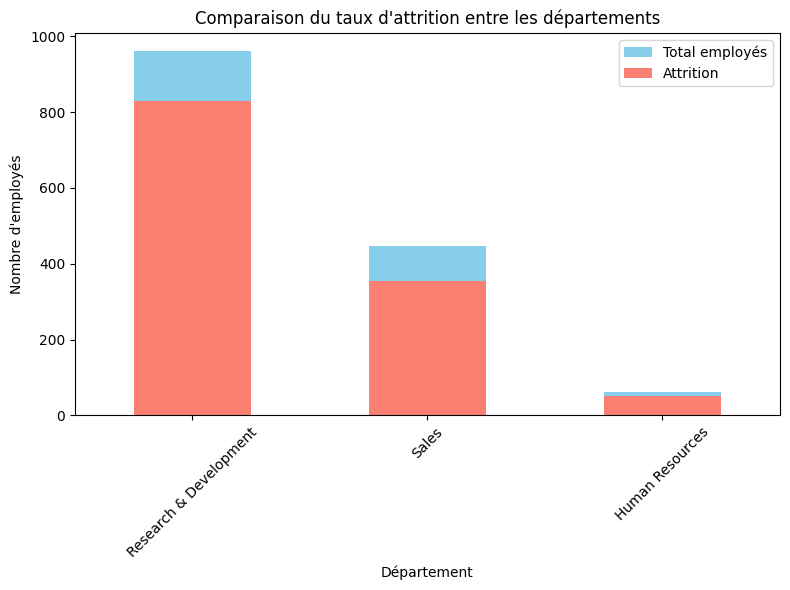

In [39]:
# Calcul du nombre total d'employés par département
nb_employes_par_departement = rh_df['Department'].value_counts()

# Calcul du nombre d'employés ayant démissionné par département
nb_attrition_par_departement = rh_df[rh_df['Attrition'] == 0]['Department'].value_counts()

# Création du diagramme à barres pour la comparaison du taux d'attrition entre les départements
plt.figure(figsize=(8, 6))
nb_employes_par_departement.plot(kind='bar', color='skyblue', label='Total employés')
nb_attrition_par_departement.plot(kind='bar', color='salmon', label='Attrition')
plt.xlabel('Département')
plt.ylabel('Nombre d\'employés')
plt.title('Comparaison du taux d\'attrition entre les départements')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Le département des Ressources Humaines semble avoir un taux d'attrition relativement élevé par rapport aux autres départements.
- Le département de la Recherche et Développement présente un taux d'attrition plus bas en comparaison avec les Ressources Humaines et les Ventes.
- Le département des Ventes montre également un taux d'attrition significatif, bien que légèrement inférieur à celui des Ressources Humaines.

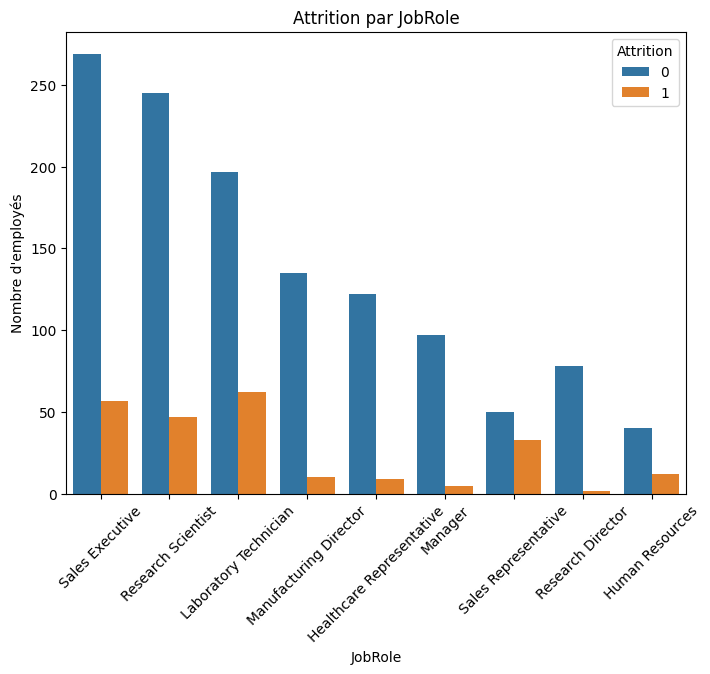

In [40]:
# Créer un countplot pour visualiser l'attrition par JobRole
plt.figure(figsize=(8, 6))
sns.countplot(data=rh_df, x='JobRole', hue='Attrition')
plt.title('Attrition par JobRole')
plt.xlabel('JobRole')
plt.ylabel('Nombre d\'employés')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Calculer le nombre total d'employés dans chaque catégorie de JobRole
total_employees_by_jobrole = rh_df['JobRole'].value_counts()

# Calculer le nombre d'employés ayant quitté l'entreprise dans chaque catégorie de JobRole
attrition_by_jobrole = rh_df.groupby('JobRole')['Attrition'].value_counts().unstack().fillna(0)[1]

# Calculer les proportions d'attrition pour chaque catégorie de JobRole
attrition_proportions_by_jobrole = attrition_by_jobrole / total_employees_by_jobrole

# Afficher les proportions d'attrition
print(attrition_proportions_by_jobrole)


JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64


les proportions d'attrition par JobRole :

- **Healthcare Representative:** 6.9% d'attrition.
- **Human Resources:** 23.1% d'attrition.
- **Laboratory Technician:** 23.9% d'attrition.
- **Manager:** 4.9% d'attrition.
- **Manufacturing Director:** 6.9% d'attrition.
- **Research Director:** 2.5% d'attrition.
- **Research Scientist:** 16.1% d'attrition.
- **Sales Executive:** 17.5% d'attrition.
- **Sales Representative:** 39.8% d'attrition.

il y'a des variations significatives dans les taux d'attrition selon les différents rôles. Les directeurs de recherche et les managers ont des taux d'attrition relativement bas, tandis que les représentants des ventes ont le taux le plus élevé, suivi des techniciens de laboratoire et des ressources humaines. Ces différences suggèrent que des facteurs spécifiques à chaque rôle peuvent influencer les décisions des employés de quitter l'entreprise.

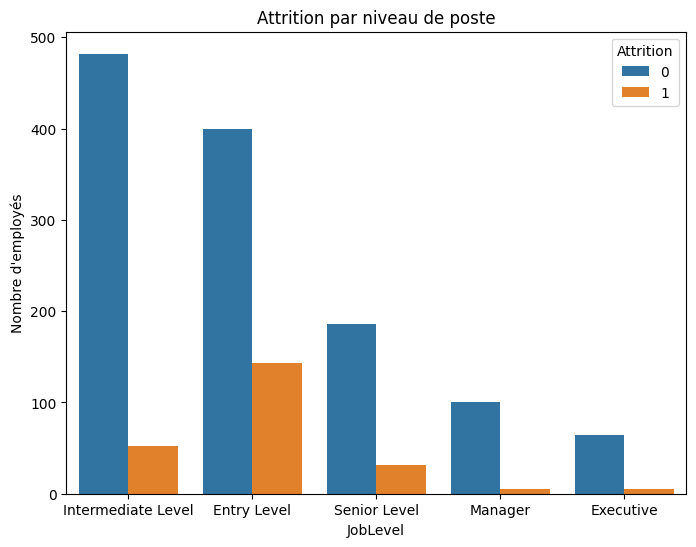

In [42]:
# Créer un countplot pour visualiser l'attrition par JobLevel
plt.figure(figsize=(8, 6))
sns.countplot(data=rh_df, x='JobLevel', hue='Attrition')
plt.title('Attrition par niveau de poste')
plt.xlabel('JobLevel')
plt.ylabel('Nombre d\'employés')
plt.show()



- il y a des variations significatives dans les taux d'attrition selon le niveau de poste. Les employés de niveau d'entrée présentent le taux le plus élevé, ce qui peut refléter des défis spécifiques rencontrés par les nouveaux employés. En revanche, les cadres et les gestionnaires semblent avoir des taux d'attrition plus faibles, ce qui peut indiquer une plus grande stabilité ou satisfaction professionnelle à ces niveaux. Les employés de niveau intermédiaire et senior montrent des taux d'attrition modérés.


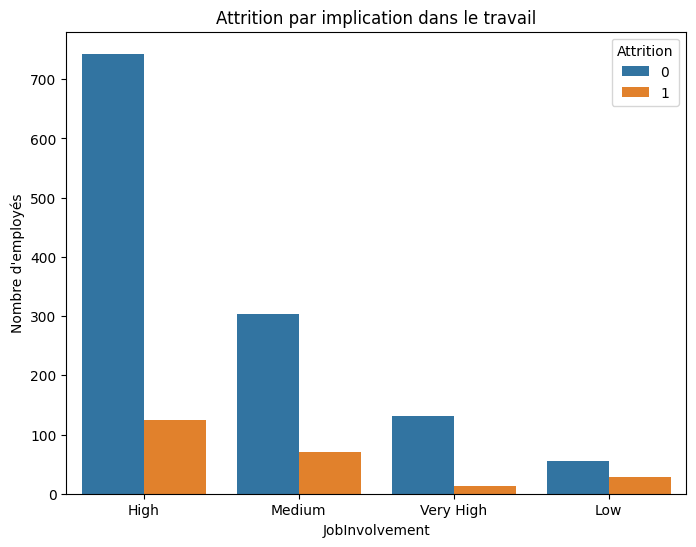

In [43]:
# Créer un countplot pour visualiser l'attrition par JobInvolvement
plt.figure(figsize=(8, 6))
sns.countplot(data=rh_df, x='JobInvolvement', hue='Attrition')
plt.title('Attrition par implication dans le travail')
plt.xlabel('JobInvolvement')
plt.ylabel('Nombre d\'employés')
plt.show()


- Les résultats indiquent que les employés ayant un niveau d'implication "High" ont généralement un taux d'attrition plus faible, tandis que ceux avec un niveau "Low" ont le taux le plus élevé. Ceci suggère qu'il peut y avoir une corrélation entre le niveau d'implication dans le travail et le taux d'attrition.

### <span style="color:#124076">Conclusion pour le Deuxiéme groupe </span>


L'analyse des différents facteurs révèle des tendances significatives quant à leur impact sur le taux d'attrition au sein de l'entreprise:
* **Département :**
- Les départements des Ressources Humaines et des Ventes présentent des taux d'attrition plus élevés, indiquant des défis spécifiques ou des problèmes de satisfaction au travail dans ces domaines.
* **Rôle :**
- Les représentants des ventes, les techniciens de laboratoire et les ressources humaines ont des taux d'attrition plus élevés.
* **Niveau de poste :**
- Les employés de niveau d'entrée ont le taux d'attrition le plus élevé, tandis que les cadres et les gestionnaires ont des taux plus faibles, soulignant les défis d'adaptation pour les nouveaux employés et les opportunités de développement professionnel limitées.
* **Implication dans le travail :**
Les employés moins impliqués ont tendance à avoir des taux d'attrition plus élevés, soulignant l'importance de l'engagement et de la satisfaction au travail dans la rétention des employés.



> ***Expérience et performance au travail***


In [44]:
#créer une nouvelle DataFrame à partir de la DataFrame existante rh_df en ne sélectionnant que les colonnes suivantes 
var_exp= rh_df[['BusinessTravel', 'DailyRate', 'HourlyRate' ,'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike','PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear','Attrition']]

In [45]:
# Afficher la Structure des données 
var_exp.describe(include='all')


,BusinessTravel,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Attrition
count,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,3,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Travel_Rarely,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN
freq,1043,NaN,NaN,NaN,NaN,NaN,1244,NaN,NaN,NaN,NaN
mean,NaN,802.485714,65.891156,6502.931293,14313.103401,15.209524,NaN,0.793878,11.279592,2.799320,0.161224
std,NaN,403.509100,20.329428,4707.956783,7117.786044,3.659938,NaN,0.852077,7.780782,1.289271,0.367863
min,NaN,102.000000,30.000000,1009.000000,2094.000000,11.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,465.000000,48.000000,2911.000000,8047.000000,12.000000,NaN,0.000000,6.000000,2.000000,0.000000
50%,NaN,802.000000,66.000000,4919.000000,14235.500000,14.000000,NaN,1.000000,10.000000,3.000000,0.000000
75%,NaN,1157.000000,83.750000,8379.000000,20461.500000,18.000000,NaN,1.000000,15.000000,3.000000,0.000000


Jetons un coup d'œil , on peut remarquer que : 
* **Pour la colonne 'BusinessTravel'**:
   - La modalité la plus fréquente est "Travel_Rarely", indiquant que la          plupart des employés voyagent rarement
* **Pour la colonne 'DailyRate'**:
   - La distribution des taux journaliers semble assez variée, avec une moyenne d'environ 802.
   -  L'écart-type élevé suggère une dispersion importante des taux journaliers.
* **Pour la colonne 'HourlyRate''**:
   - Les taux horaires varient entre 30 et 100, avec une moyenne d'environ 65.
   - La distribution semble relativement uniforme, avec un écart-type modéré.
* **Pour la colonne 'MonthlyIncome'**:
   - Les revenus mensuels varient de 1009 à 19999, avec une moyenne d'environ       6502.
   - Il y a une grande variation dans les revenus mensuels des employés, avec      un écart-type élevé.
* **Pour la colonne 'MonthlyRate'**:
   - Les taux mensuels varient de 2094 à 26999, avec une moyenne d'environ 14313..
   -  La distribution des taux mensuels semble également assez variée.
* **Pour la colonne 'PercentSalaryHike''**:
  - La plupart des employés ont eu une augmentation de salaire de faible pourcentage, comme indiqué par la modalité "Low". 
* **Pour la colonne 'PerformanceRating'**:
   - La modalité la plus fréquente est "Low", indiquant que la plupart des employés ont un faible niveau de performance.
* **Pour la colonne 'StockOptionLevel'**:
   - La plupart des employés ont un niveau d'options d'achat d'actions de 0 ou 1, avec une moyenne d'environ 0.79.
   - Cette variable semble être continue avec des valeurs de 0 à 3.
* **Pour la colonne 'TotalWorkingYears''**:
   - Les années totales de travail varient de 0 à 40, avec une moyenne d'environ 11.28.
   - La distribution semble avoir une grande variabilité.
* **Pour la colonne 'TrainingTimesLastYear''**:
   - Le nombre de formations l'année dernière varie de 0 à 6, avec une moyenne d'environ 2.80.
   - La distribution semble également variée, avec un écart-type modéré.

*`=> Après avoir exploré les caractéristiques de ce groupe de  données, nous utiliserons la méthode de la boîte à moustaches pour détecter et identifier les valeurs aberrantes.`*

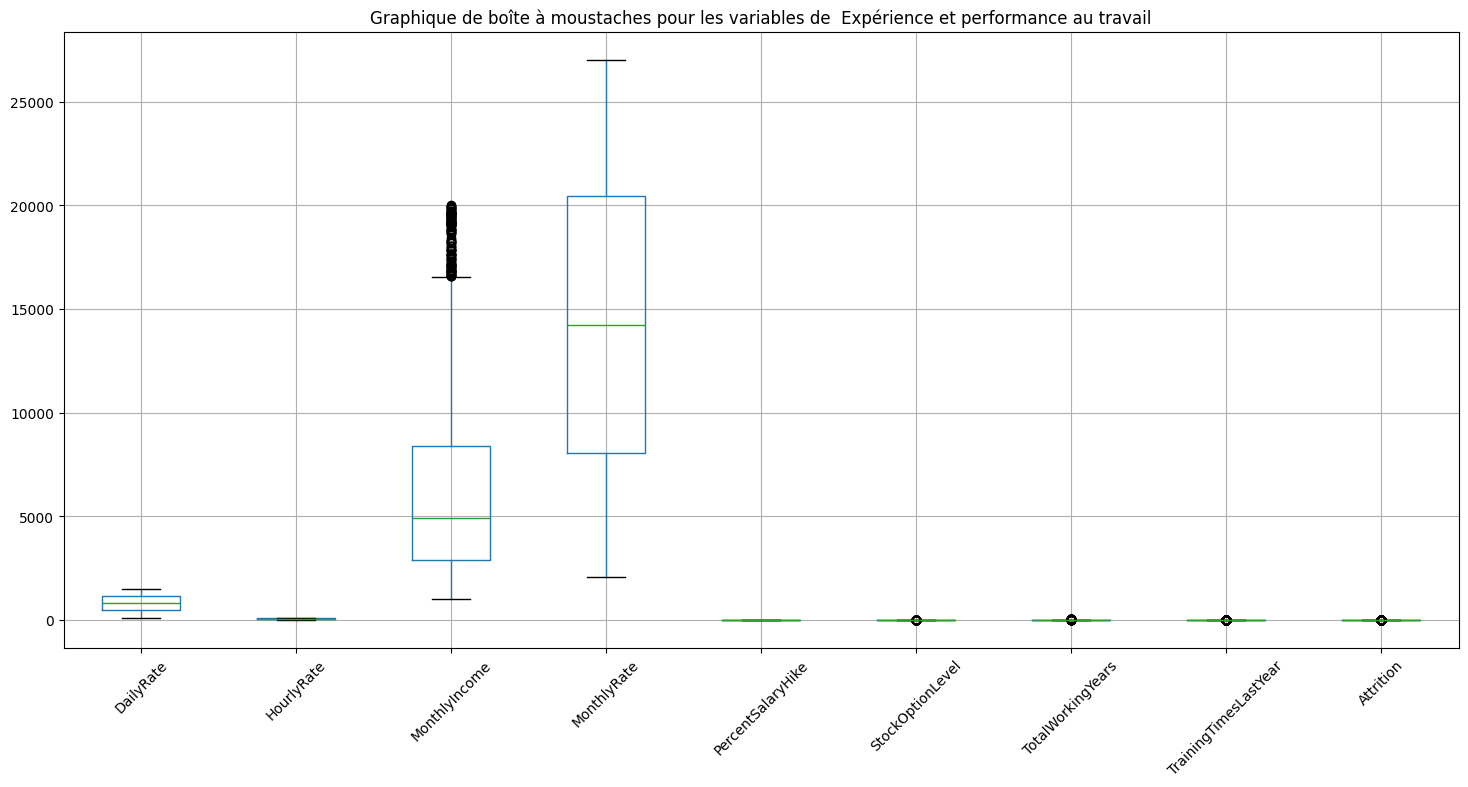

In [46]:
# Tracer le graphique de boîte à moustaches
plt.figure(figsize=(18, 8))
var_exp.boxplot()
plt.xticks(rotation=45)
plt.title('Graphique de boîte à moustaches pour les variables de  Expérience et performance au travail')
plt.show()


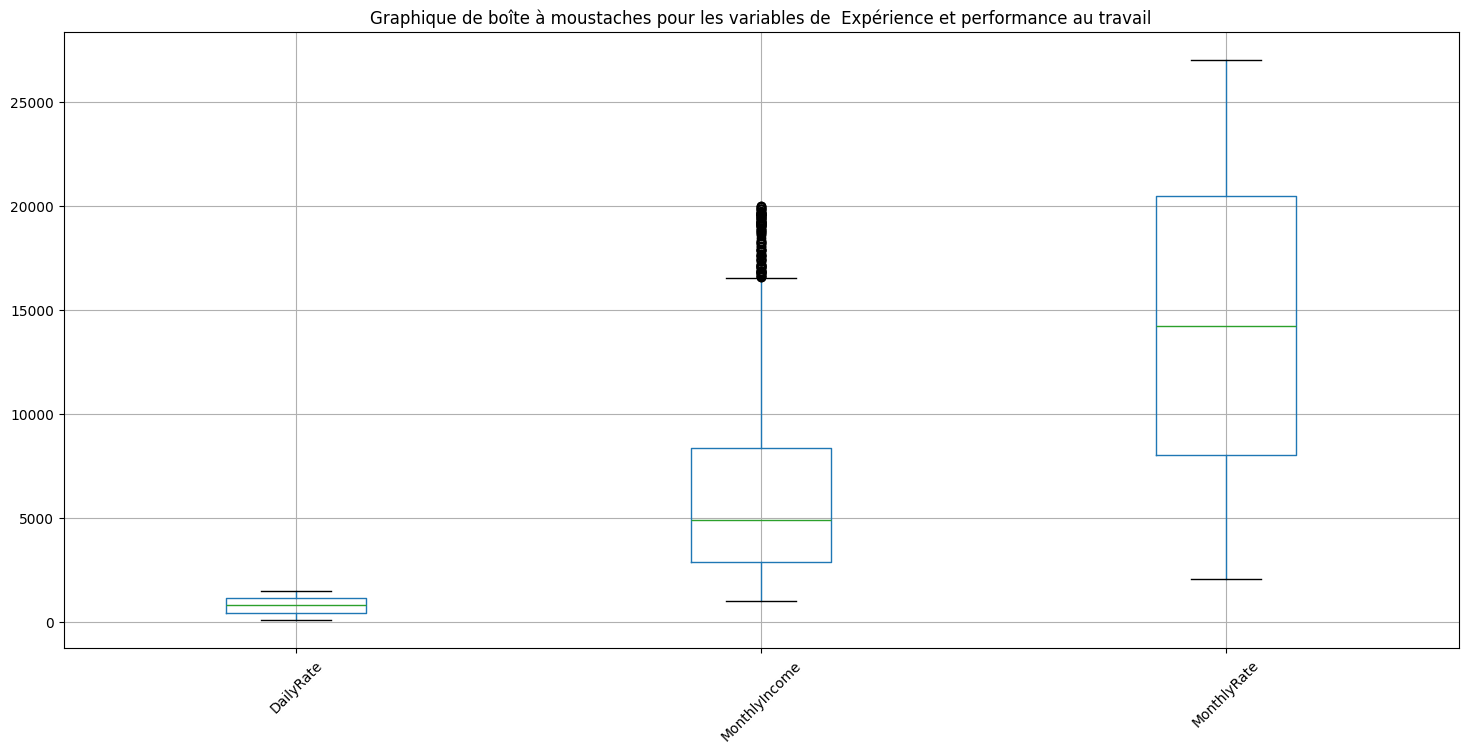

In [47]:
# Sélectionner les colonnes pertinentes
var_exp1 = rh_df[[ 'DailyRate' ,'MonthlyIncome','MonthlyRate']]

# Tracer le graphique de boîte à moustaches
plt.figure(figsize=(18, 8))
var_exp1.boxplot()
plt.xticks(rotation=45)
plt.title('Graphique de boîte à moustaches pour les variables de  Expérience et performance au travail')
plt.show()


*`=> Nous remarquons que la colonne "MonthlyIncome" contient des valeurs aberrantes. Nous allons nous concentrer sur cette colonne spécifique afin de calculer le nombre de valeurs aberrantes présentes.`*

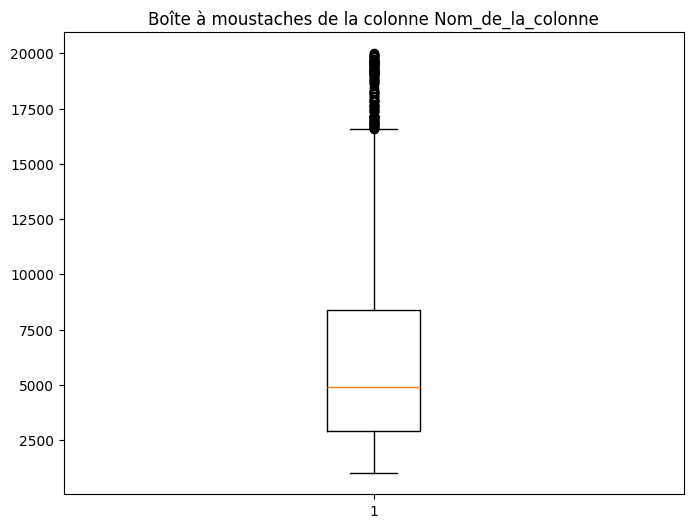

Nombre de valeurs aberrantes dans la colonne MonthlyIncome: 114


In [48]:
# Sélectionner la colonne MonthelyIncome pour identifier les valeurs aberrantes
colonne = rh_df['MonthlyIncome']
# Tracer la boîte à moustaches pour mieux visualiser les valeurs aberrantes
plt.figure(figsize=(8, 6))
plt.boxplot(colonne)
plt.title('Boîte à moustaches de la colonne ' + 'Nom_de_la_colonne')
plt.show()
# Calculer les bornes inférieure et supérieure des valeurs aberrantes
Q1 = colonne.quantile(0.25)
Q3 = colonne.quantile(0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR
# Identifier les valeurs aberrantes
valeurs_aberrantes = colonne[(colonne < borne_inf) | (colonne > borne_sup)]
nombre_valeurs_aberrantes = len(valeurs_aberrantes)

print("Nombre de valeurs aberrantes dans la colonne " + 'MonthlyIncome' + ":", nombre_valeurs_aberrantes)

*`=> Supposons que seules les valeurs aberrantes se trouvent dans cette colonne spécifique. Dans ce cas, la proportion par rapport à l'ensemble du jeu de données est de Proportion=(114/1470))×100≈7.76% > 5%. Cependant, étant donné que cette proportion est assez élevée, il n'est pas judicieux de supprimer toutes les lignes .`*

-  Donc nous utiliserons une heatmap de corrélation pour visualiser rapidement les relations de corrélation entre les différentes variables du troisième groupe. 

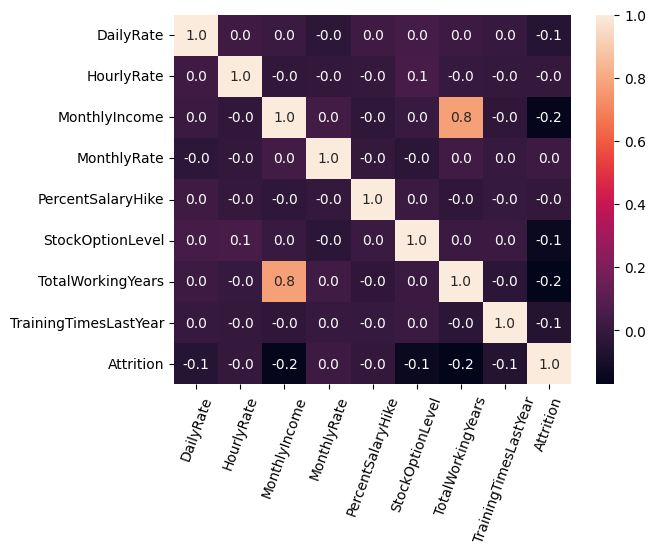

In [49]:
columns = ['DailyRate',
          'HourlyRate',
          'MonthlyIncome',
          'MonthlyRate',
          'PercentSalaryHike',
          'StockOptionLevel',
          'TotalWorkingYears',
          'TrainingTimesLastYear', 
           'Attrition'
          ]

sns.heatmap(var_exp[columns].corr(),annot=True, fmt=".1f")
plt.xticks(rotation=70)
plt.show()

*  En ce qui concerne l'attrition, nous soupçonnons que les colonnes MonthlyIncome et TotalWorkingYears pourraient avoir une corrélation négative. Pour confirmer cela, nous utiliserons le coefficient de corrélation de Pearson.

In [50]:
correlation, p_value = stats.pearsonr(var_exp['MonthlyIncome'], var_exp['Attrition'])
print("Coefficient de corrélation de Pearson:", correlation)
print("Valeur p associée:", p_value)
correlation, p_value = stats.pearsonr(var_exp['TotalWorkingYears'], var_exp['Attrition'])
print("Coefficient de corrélation de Pearson:", correlation)
print("Valeur p associée:", p_value)

Coefficient de corrélation de Pearson: -0.15983958238498833
Valeur p associée: 7.147363985354331e-10
Coefficient de corrélation de Pearson: -0.17106324613622617
Valeur p associée: 4.0618781112671355e-11


 *`=>bien qu'il y ait une corrélation négative statistiquement significative entre le revenu mensuel et le Depart des employes et entre Années de travail totales le Depart des employes  , la force de cette corrélation est relativement faible.`*

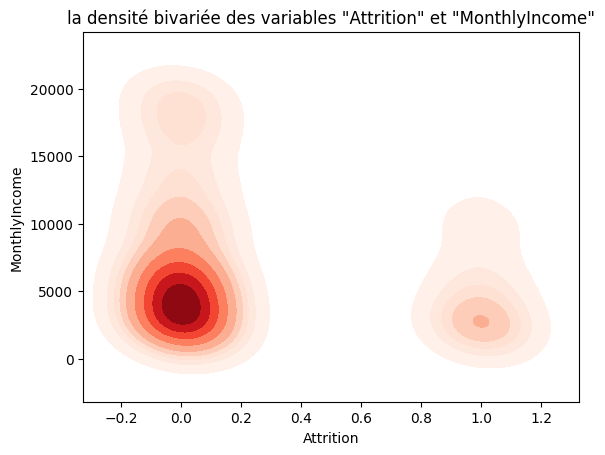

In [51]:
sns.kdeplot(
    x="Attrition", 
    y="MonthlyIncome", 
    cmap="Reds", 
    shade=True, 
    data=var_exp).set_title('la densité bivariée des variables "Attrition" et "MonthlyIncome"');

 *`=>En dépit d'une corrélation relativement faible entre le revenu mensuel et le départ des employés, cette représentation graphique suggère une tendance où les employés percevant un salaire mensuel moins élevé sont plus enclins à quitter l'entreprise. Cette observation est soulignée par la coloration plus intense dans les régions où le taux d'attrition est plus élevé, ce qui peut indiquer une relation entre le niveau de revenu et la décision de quitter l'entreprise."`*

In [52]:
rh_df['BusinessTravel'].value_counts(dropna=False)

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [53]:
rh_df['PerformanceRating'].value_counts(dropna=False)

PerformanceRating
Low     1244
High     226
Name: count, dtype: int64

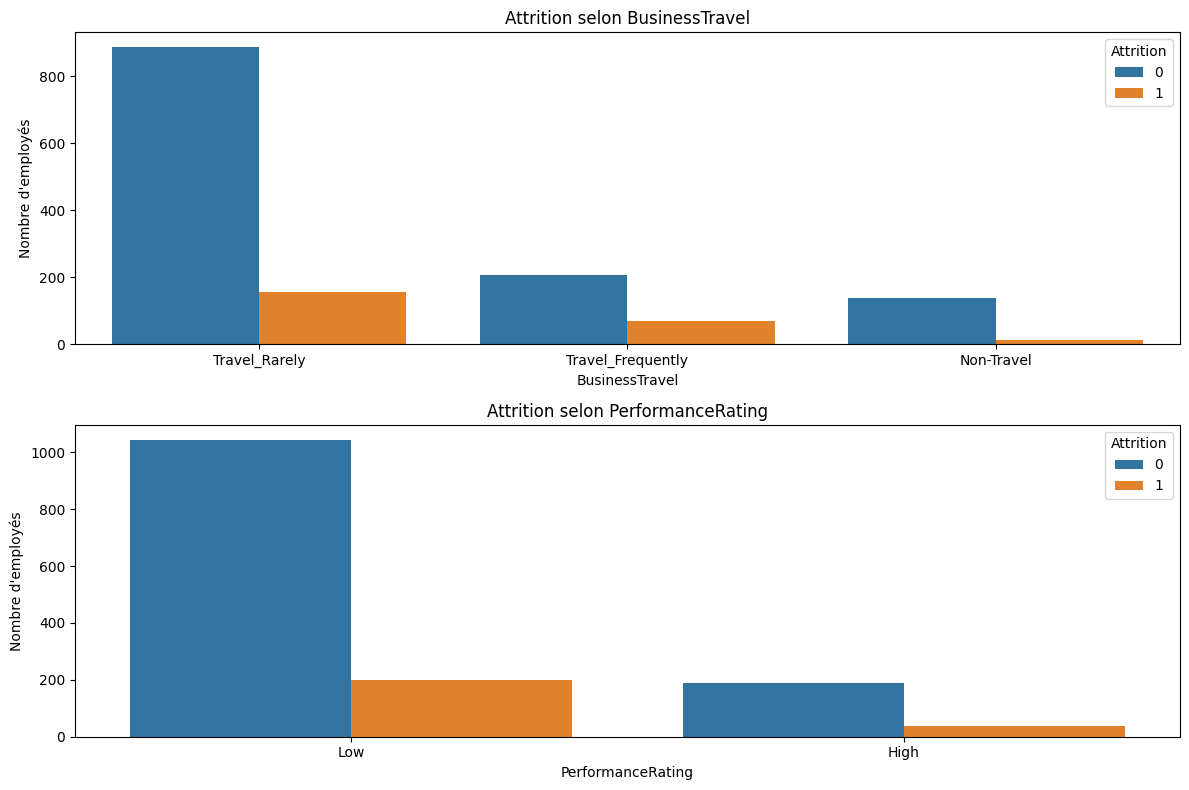

In [54]:
plt.figure(figsize=(12, 8))

# Premier sous-graphique pour la BusinessTravel
plt.subplot(2, 1, 1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=var_exp)
plt.title('Attrition selon BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Nombre d\'employés')

# Deuxième sous-graphique pour la PerformanceRating
plt.subplot(2, 1, 2)
sns.countplot(x='PerformanceRating', hue='Attrition', data=var_exp)
plt.title('Attrition selon PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Nombre d\'employés')

plt.tight_layout()
plt.show()


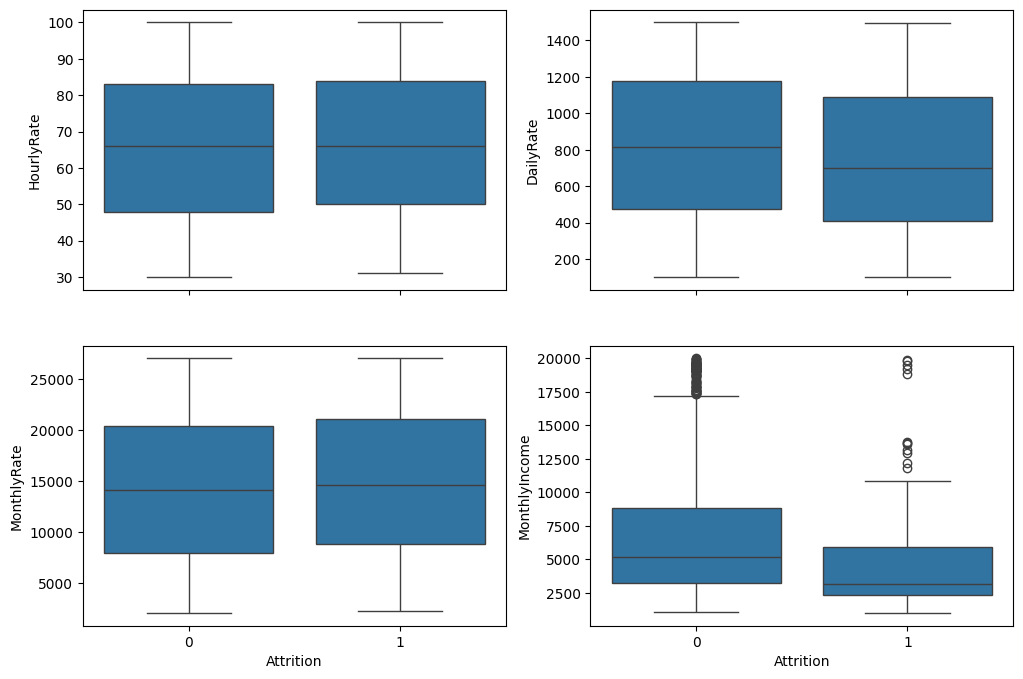

In [55]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
sns.boxplot(x='Attrition', y='HourlyRate', data=var_exp, ax=axes[0][0])
sns.boxplot(x='Attrition', y='DailyRate', data=var_exp, ax=axes[0][1])
sns.boxplot(x='Attrition', y='MonthlyRate',data=var_exp, ax=axes[1][0])
sns.boxplot(x='Attrition', y='MonthlyIncome',data=var_exp, ax=axes[1][1])
plt.show();

* En superposant les deux diagrammes à barres et les boîtes à moustaches, nous pouvons interpréter les relations entre l'attrition et les variables BusinessTravel et PerformanceRating.
 - 1 : **Attrition selon BusinessTravel** :
      - Pour les employés qui voyagent rarement (Travel_Rarely), nous observons une proportion plus élevée d'attrition par rapport aux autres types de voyages.
 - 2 :**Attrition selon PerformanceRating**:
      -  Nous remarquons que l'attrition est plus élevée parmi les employés ayant un faible niveau de performance (Low).
  - 3 :**Attrition selon MonthlyIncome**: 
    - Les employés avec un Revenu Mensuel plus bas sont plus susceptibles de quitter l'entreprise
     
     
     *`=>  nous pouvons conclure que   les employés qui voyagent rarement et ont un faible niveau de performance pourraient être plus susceptibles de quitter l'entreprise `*
 

### <span style="color:#124076">Conclusion pour la troiseme groupe </span>

En combinant ces observations, nous pouvons conclure que :
- les employés ayant un salaire mensuel plus bas,**(MonthlyIncome)**
- moins d'années d'expérience,**(TotalWorkingYears)** 
- qui voyagent rarement pour le travail **(BusinessTravel = Travel_Rarely)**
- et/ou qui ont un faible niveau de performance **(PerformanceRating = low )** 
      
      --> sont plus susceptibles de quitter l'entreprise 
 

> ***Satisfaction et équilibre travail-vie***


In [56]:
#créer une nouvelle DataFrame à partir de la DataFrame existante rh_df en ne sélectionnant que les colonnes suivantes 
var_sat= rh_df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction' ,'WorkLifeBalance']]

In [57]:
print(var_sat.dtypes)

EnvironmentSatisfaction     object
JobSatisfaction             object
RelationshipSatisfaction    object
WorkLifeBalance             object
dtype: object


In [58]:
var_sat.describe(include = 'all')

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance
count,1470,1470,1470,1470
unique,4,4,4,4
top,High,Very High,High,High
freq,453,459,459,893


     --> il semblerait que les employés soient globalement satisfaits de leur environnement de travail, de leur poste, de leurs relations professionnelles et de leur équilibre vie professionnelle-vie personnelle

In [59]:
var_sat.head()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance
0,Medium,Very High,Low,Low
1,High,Medium,Very High,High
2,Very High,High,Medium,High
3,Very High,High,High,High
4,Low,Medium,Very High,High


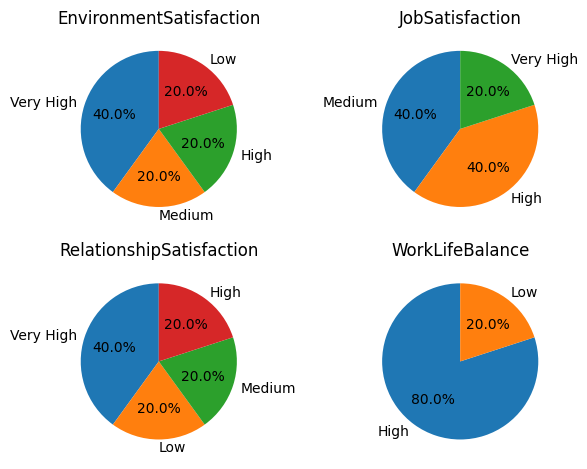

In [60]:
# Création du DataFrame avec les nouvelles données
data = {
    'EnvironmentSatisfaction': ['Medium', 'High', 'Very High', 'Very High', 'Low'],
    'JobSatisfaction': ['Very High', 'Medium', 'High', 'High', 'Medium'],
    'RelationshipSatisfaction': ['Low', 'Very High', 'Medium', 'High', 'Very High'],
    'WorkLifeBalance': ['Low', 'High', 'High', 'High', 'High']
}

df = pd.DataFrame(data)

# Création des labels uniques et des fréquences pour chaque colonne
unique_labels = df.apply(pd.Series.value_counts).columns
sizes = [df[col].value_counts() for col in df.columns]

# Création des sous-plots
fig, axs = plt.subplots(2, 2)

# Parcourir chaque colonne et créer un diagramme à secteurs
for ax, size, label in zip(axs.flatten(), sizes, unique_labels):
    ax.pie(size, labels=size.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(label)

# Ajustement de la disposition
plt.tight_layout()

# Affichage du diagramme
plt.show()


Jetons un coup d'œil , on peut remarquer que : 
* **Pour la colonne 'EnvironmentSatisfaction'**:
   - 40 % des employés sont très satisfaits de leur environnement de travail(Very High).
   - 20 % des employés sont  satisfaits de leur environnement de travail.(High)
   - 20 % des employés sont moyennement satisfaits de leur environnement de travail. (Medium)
   - 20 % des employés sont peu satisfaits de leur environnement de travail.(Low)
* **Pour la colonne 'JobSatisfaction'**:
   - 20 % des employés sont très satisfaits de leur travail.(Very High)
   - 40 % des employés sont moyennement satisfaits de leur  travail. (Medium)
   - 40 % des employés sont peu satisfaits de leur  travail.(Low)journaliers.
* **Pour la colonne 'RelationshipSatisfaction''**:
   - 40 % des employés sont très satisfaits de leur relations au travail l(Very High).
   - 20 % des employés sont  satisfaits de leur relations au travail.(High)
   - 20 % des employés sont moyennement satisfaits de leur relations au travail. (Medium)
   - 20 % des employés sont peu satisfaits de leur relations au travail.(Low)
* **Pour la colonne 'WorkLifeBalance'**:
  - 80 % des employés perçoivent un bon équilibre entre leur vie professionnelle et leur vie personnelle..(High)
  - 20 % des employés perçoivent un bon équilibre entre leur vie professionnelle et leur vie personnelle..(Low)

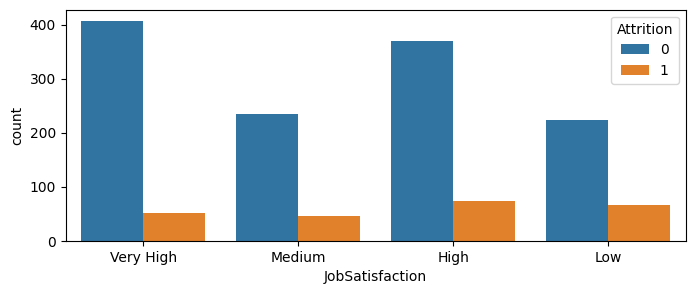

Attrition,0,1
JobSatisfaction,,
Low,0.771626,0.228374
Medium,0.835714,0.164286
High,0.834842,0.165158
Very High,0.886710,0.113290


In [61]:
plt.figure(figsize=(8, 3))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=rh_df)
plt.show();
pd.crosstab(rh_df.JobSatisfaction, rh_df.Attrition, 
            normalize='index').reindex(index=['Low', 'Medium', 'High', 'Very High'])

     ---> on peut interpreter que Une baisse de la satisfaction au travail accroît la probabilité que les employés décident de quitter 
    l'entreprise.

<Figure size 800x600 with 0 Axes>

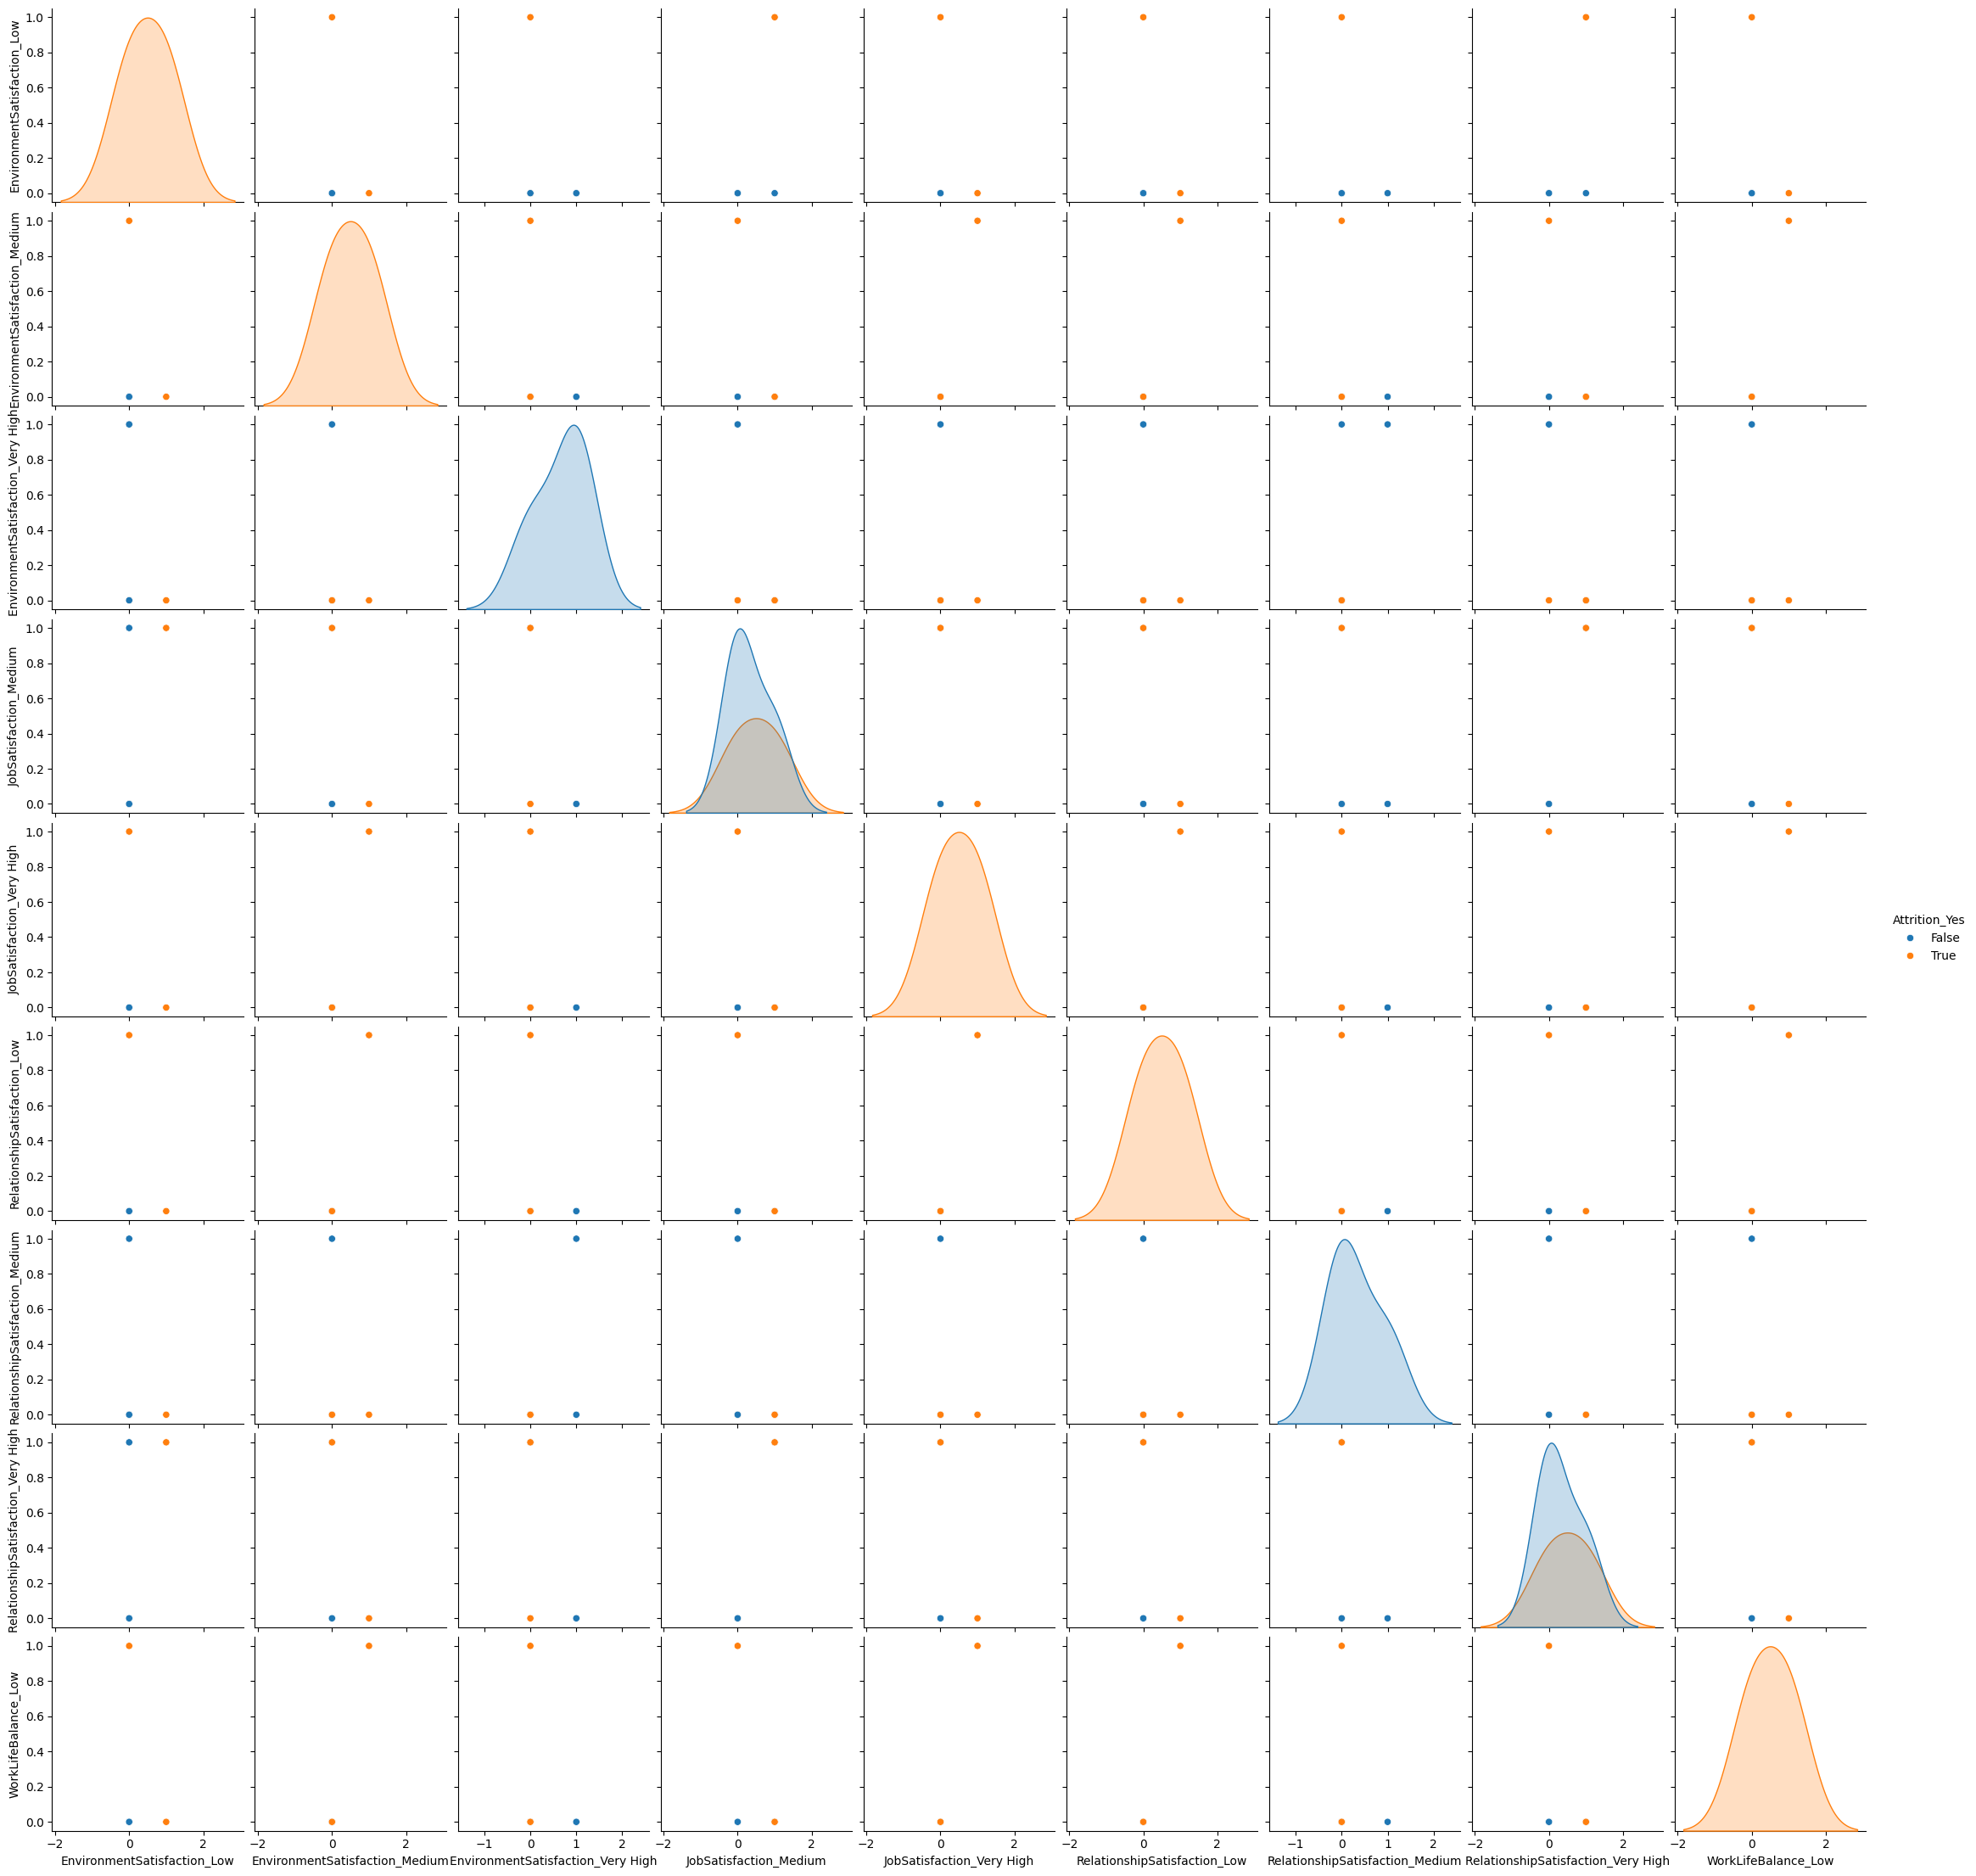

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données dans un DataFrame
df = pd.DataFrame({
    'EnvironmentSatisfaction': ['Medium', 'High', 'Very High', 'Very High', 'Low'],
    'JobSatisfaction': ['Very High', 'Medium', 'High', 'High', 'Medium'],
    'RelationshipSatisfaction': ['Low', 'Very High', 'Medium', 'High', 'Very High'],
    'WorkLifeBalance': ['Low', 'High', 'High', 'High', 'High'],
    'Attrition': ['Yes', 'No', 'No', 'No', 'Yes']
})

# Sélectionner uniquement les colonnes pertinentes pour l'analyse (celles contenant "Low")
df_low = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Attrition']]
df_low = pd.get_dummies(df_low, drop_first=True)

# Réduire la taille du graphique
plt.figure(figsize=(8, 6))

# Visualisation des données avec la répartition des classes Attrition pour l'attribut "Low"
sns.pairplot(df_low, hue='Attrition_Yes', diag_kind='kde')
plt.show()


*`=> Après avoir exploré les caractéristiques de ce groupe de  données, La catégorie "low" dans les colonnes EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction et WorkLifeBalance semble être associée à un risque accru de départ des employés.`*

### <span style="color:#124076">Conclusion pour la quatrieme groupe </span>

*`=> les données suggèrent que les employés insatisfaits dans des domaines spécifiques ont plus de chances de quitter l'entreprise, malgré une satisfaction générale élevée. Cela souligne l'importance de cibler l'amélioration de ces aspects pour réduire l'attrition."`*

> ***Autres Facteurs***


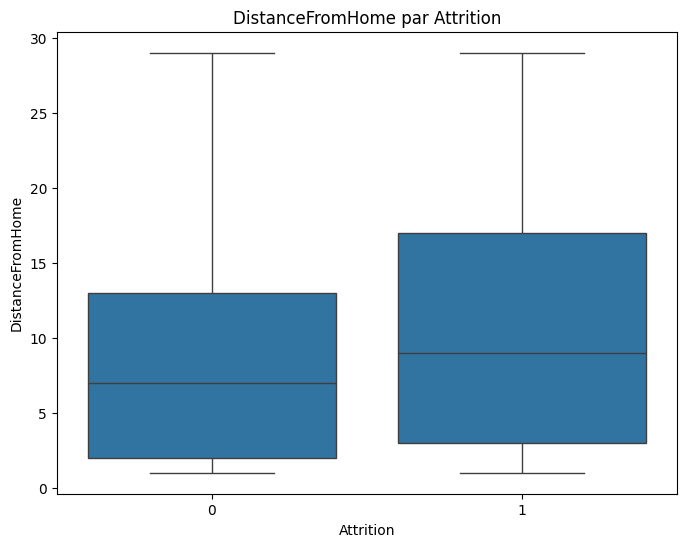

Statistique de test Mann-Whitney U : 164225.5
Valeur de p associée au test : 0.0023870470273627984


In [63]:
# Boxplot de la distance du domicile au travail par attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=rh_df)
plt.title('DistanceFromHome par Attrition')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.show()

# Test de Mann-Whitney U pour comparer les distances de déplacement entre les deux groupes
from scipy.stats import mannwhitneyu
attrition_yes = rh_df[rh_df['Attrition'] == 1]['DistanceFromHome']
attrition_no = rh_df[rh_df['Attrition'] == 0]['DistanceFromHome']
stat, p = mannwhitneyu(attrition_yes, attrition_no)
print('Statistique de test Mann-Whitney U :', stat)
print('Valeur de p associée au test :', p)


- La statistique de test Mann-Whitney U est de 164225.5 et la valeur de p associée au test est d'environ 0.0024. Avec une valeur de p aussi basse, inférieure au seuil de signification typique de 0.05, cela suggère qu'il existe une différence statistiquement significative dans la distance domicile-travail entre les employés ayant attritionné et ceux qui ne l'ont pas fait. Ainsi, on peut conclure que la distance domicile-travail a probablement un impact sur l'attrition dans cette entreprise.

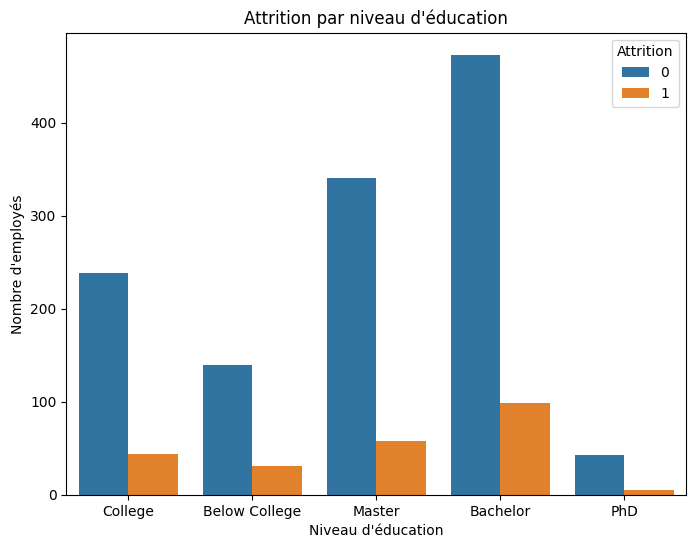

Statistique de test chi-deux : 3.0739613982367193
Valeur de p associée au test : 0.5455253376565949


In [64]:
# Countplot de l'attrition par niveau d'éducation
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Attrition', data=rh_df)
plt.title('Attrition par niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre d\'employés')
plt.show()

# Test de chi-deux pour évaluer l'association entre l'éducation et l'attrition
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(rh_df['Education'], rh_df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Statistique de test chi-deux :', chi2)
print('Valeur de p associée au test :', p)


- Le countplot illustre la répartition de l'attrition par niveau d'éducation. Cependant, le test de chi-deux montre une statistique de test de 3.074 et une valeur de p associée de 0.546. Avec une valeur de p aussi élevée, cela suggère qu'il n'y a pas de relation significative entre le niveau d'éducation et l'attrition dans cette entreprise.

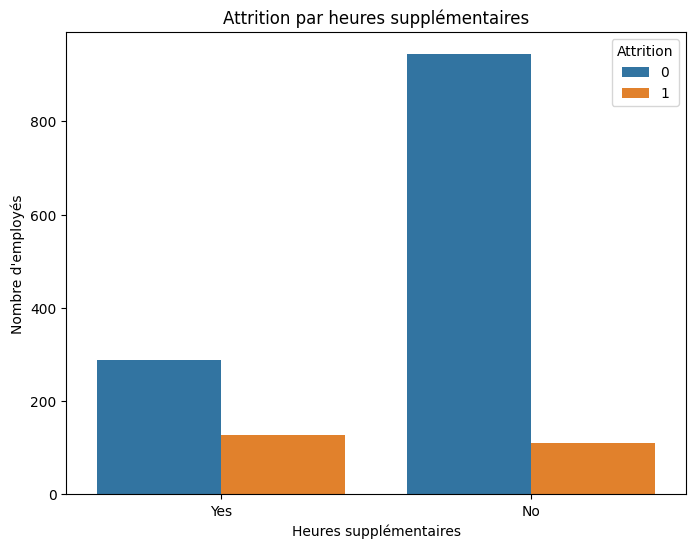

Statistique de test chi-deux : 87.56429365828768
Valeur de p associée au test : 8.158423721538322e-21


In [65]:
# Countplot de l'attrition par heures supplémentaires
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=rh_df)
plt.title('Attrition par heures supplémentaires')
plt.xlabel('Heures supplémentaires')
plt.ylabel('Nombre d\'employés')
plt.show()

# Test de chi-deux pour évaluer l'association entre les heures supplémentaires et l'attrition
contingency_table = pd.crosstab(rh_df['OverTime'], rh_df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Statistique de test chi-deux :', chi2)
print('Valeur de p associée au test :', p)


- Le countplot illustre la répartition de l'attrition en fonction des heures supplémentaires effectuées. Le test de chi-deux montre une statistique de test chi-deux de 87.564 et une valeur de p associée extrêmement faible, pratiquement nulle (8.16e-21). Cela indique une forte association entre les heures supplémentaires et l'attrition dans l'entreprise.

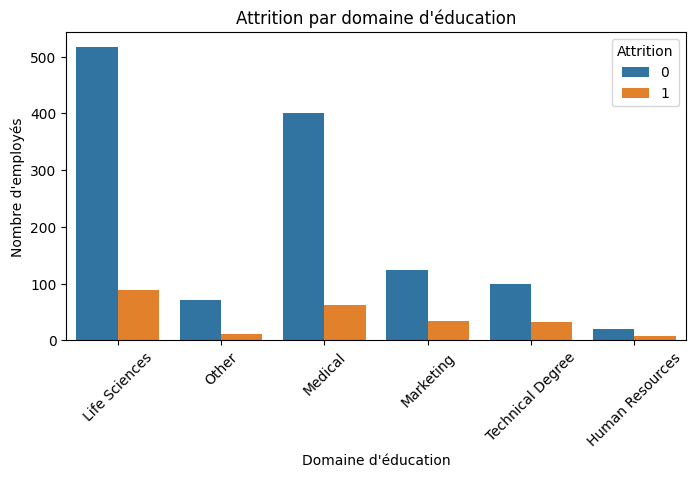

Statistique de test chi-deux : 16.024674119585427
Valeur de p associée au test : 0.006773980139025213


In [66]:
# Countplot de l'attrition par domaine d'éducation
plt.figure(figsize=(8, 4))
sns.countplot(x='EducationField', hue='Attrition', data=rh_df)
plt.title('Attrition par domaine d\'éducation')
plt.xlabel('Domaine d\'éducation')
plt.ylabel('Nombre d\'employés')
plt.xticks(rotation=45)
plt.show()

# Test de chi-deux pour évaluer l'association entre le domaine d'éducation et l'attrition
contingency_table = pd.crosstab(rh_df['EducationField'], rh_df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Statistique de test chi-deux :', chi2)
print('Valeur de p associée au test :', p)


- Le countplot met en évidence la répartition de l'attrition selon le domaine d'éducation des employés. Le test de chi-deux révèle une statistique de test chi-deux de 16.02 et une valeur de p associée de 0.0067. Cette valeur de p inférieure au seuil de significativité de 0.05 suggère qu'il existe une association significative entre le domaine d'éducation et l'attrition dans l'entreprise.

### <span style="color:#124076">Conclusion pour le cinquiéme groupe </span>

- L'analyse révèle que le domaine d'éducation, les heures supplémentaires et la distance domicile-travail ont un impact sur l'attrition. Le domaine d'éducation est significativement lié à l'attrition, tandis que les heures supplémentaires et la distance domicile-travail ont des associations encore plus fortes. Ainsi, parmi ces variables, les heures supplémentaires et la distance domicile-travail semblent être les plus susceptibles d'affecter l'attrition dans cette entreprise.

# Résumé

L'analyse exhaustive des différents facteurs révèle des tendances significatives quant à leur impact sur le taux d'attrition au sein de l'entreprise. Globalement, plusieurs conclusions peuvent être tirées :

1. **Département et Rôle :**
   Les départements des Ressources Humaines et des Ventes ainsi que certains rôles spécifiques tels que les représentants des ventes et les techniciens de laboratoire présentent des taux d'attrition plus élevés. Cela suggère que des défis ou des problèmes de satisfaction au travail spécifiques existent dans ces domaines et rôles.

2. **Niveau de Poste :**
   Les employés de niveau d'entrée ont le taux d'attrition le plus élevé, tandis que les cadres et les gestionnaires ont des taux plus faibles. Cela met en lumière les défis d'adaptation pour les nouveaux employés et l'importance des opportunités de développement professionnel pour la rétention des employés.

3. **Implication dans le Travail :**
   Les employés moins impliqués ont tendance à avoir des taux d'attrition plus élevés, soulignant l'importance de l'engagement et de la satisfaction au travail dans la rétention des employés.

4. **Facteurs Individuels :**
   Certains facteurs individuels, tels que le salaire mensuel, le nombre d'années d'expérience, les déplacements professionnels fréquents et le niveau de performance, semblent également influencer l'attrition. Les employés insatisfaits dans ces domaines ont plus de chances de quitter l'entreprise, même s'ils sont généralement satisfaits de leur travail.

5. **Éducation, Heures Supplémentaires et Distance Domicile-Travail :**
   Le domaine d'éducation est significativement lié à l'attrition, tout comme les heures supplémentaires et la distance domicile-travail. Parmi ces variables, les heures supplémentaires et la distance domicile-travail semblent avoir l'impact le plus fort sur l'attrition.

En conclusion, pour réduire l'attrition, l'entreprise devrait envisager des stratégies ciblées pour améliorer la satisfaction au travail, l'engagement des employés et les opportunités de développement professionnel, en tenant compte des différents domaines, rôles et facteurs individuels qui influent sur le taux d'attrition.